In [ ]:
# Importar las librerías necesarias
#voy añadiendo mientras que voy necesitando
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
!pip install keras
from statsmodels.tsa.seasonal import seasonal_decompose
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
!pip install keras --user
!pip install tensorflow --user
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [ ]:
!pip install tensorflow --user
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten

In [ ]:
# Leer el archivo csv
# este archivo coge los datos de corización de ACCIONA desde 2015 hasta el 19 de mayo

df = pd.read_csv('ANA.MC2015.csv')

# Convertimos la columna Date en un objeto datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2046,2023-05-15,168.649994,170.350006,167.949997,168.699997,168.699997,61721.0
2047,2023-05-16,167.350006,169.750000,167.050003,167.750000,167.750000,55528.0
2048,2023-05-17,167.600006,167.600006,165.199997,165.649994,165.649994,59763.0
2049,2023-05-18,166.250000,167.250000,163.399994,164.449997,164.449997,49541.0
2050,2023-05-19,165.000000,166.550003,164.000000,165.850006,165.850006,53745.0


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-20,73.500000,73.550003,72.709999,73.339996,56.551647,125246.0
1,2015-05-21,72.940002,73.320000,72.720001,73.129997,56.389709,96474.0
2,2015-05-22,73.000000,73.300003,72.459999,72.470001,55.880802,62831.0
3,2015-05-25,71.800003,71.800003,68.739998,70.000000,53.976204,208211.0
4,2015-05-26,69.599998,70.540001,68.290001,68.559998,52.865841,295274.0


## Análisis exploratorio de los datos y preprocesamiento

In [ ]:
# Agregamos columnas de año, mes y día
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
# df['Weekday'] = df['Date']dt.weekday  # Monday: 0, Sunday: 6 aunque no existen datos de fin de semana, la bolsa está cerrado; asi que es 0-4 de lunes-viernes

# Calcular el rendimiento diario
df['Return'] = df['Close'].pct_change()
df['Return'].fillna(0, inplace=True)

# Ver las primeras filas del dataframe
print(df.head())


        Date       Open       High        Low      Close  Adj Close    Volume  \
0 2015-05-20  73.500000  73.550003  72.709999  73.339996  56.551647  125246.0   
1 2015-05-21  72.940002  73.320000  72.720001  73.129997  56.389709   96474.0   
2 2015-05-22  73.000000  73.300003  72.459999  72.470001  55.880802   62831.0   
3 2015-05-25  71.800003  71.800003  68.739998  70.000000  53.976204  208211.0   
4 2015-05-26  69.599998  70.540001  68.290001  68.559998  52.865841  295274.0   

   Year  Month  Day    Return  
0  2015      5   20  0.000000  
1  2015      5   21 -0.002863  
2  2015      5   22 -0.009025  
3  2015      5   25 -0.034083  
4  2015      5   26 -0.020571  


In [ ]:
# Seleccionar solo las columnas numéricas de interés
num_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Return']


In [ ]:
# Verificar la presencia de valores nulos
print("Valores nulos en cada columna:\n", df[num_cols].isnull().sum())



Valores nulos en cada columna:
 Open      1
High      1
Low       1
Close     1
Volume    1
Return    0
dtype: int64


In [ ]:
# Estadísticas descriptivas básicas
print("Estadísticas descriptivas:\n", df[num_cols].describe())

Estadísticas descriptivas:
               Open         High          Low        Close        Volume  \
count  2050.000000  2050.000000  2050.000000  2050.000000  2.050000e+03   
mean    104.355288   105.527005   103.063473   104.345746  1.503878e+05   
std      41.241451    41.814503    40.652993    41.276952  1.373260e+05   
min      59.660000    60.500000    59.439999    59.820000  0.000000e+00   
25%      71.090002    71.732502    70.370001    70.965000  8.310200e+04   
50%      90.650002    91.790001    89.250000    90.775002  1.185310e+05   
75%     135.199997   137.349995   133.300003   135.300003  1.770568e+05   
max     210.600006   211.000000   206.800003   210.199997  2.741804e+06   

            Return  
count  2051.000000  
mean      0.000559  
std       0.017934  
min      -0.174897  
25%      -0.007991  
50%       0.000962  
75%       0.009705  
max       0.149003  


In [ ]:
# Eliminamos los datos nulos. Los datos nulos se eliminan de un DataFrame para evitar inconsistencias en los cálculos, garantizar la compatibilidad con algoritmos de machine learning y mejorar la calidad de los modelos resultantes. Esto se hace para asegurar la integridad de los análisis y prevenir posibles errores o resultados inexactos.
df = df.dropna()

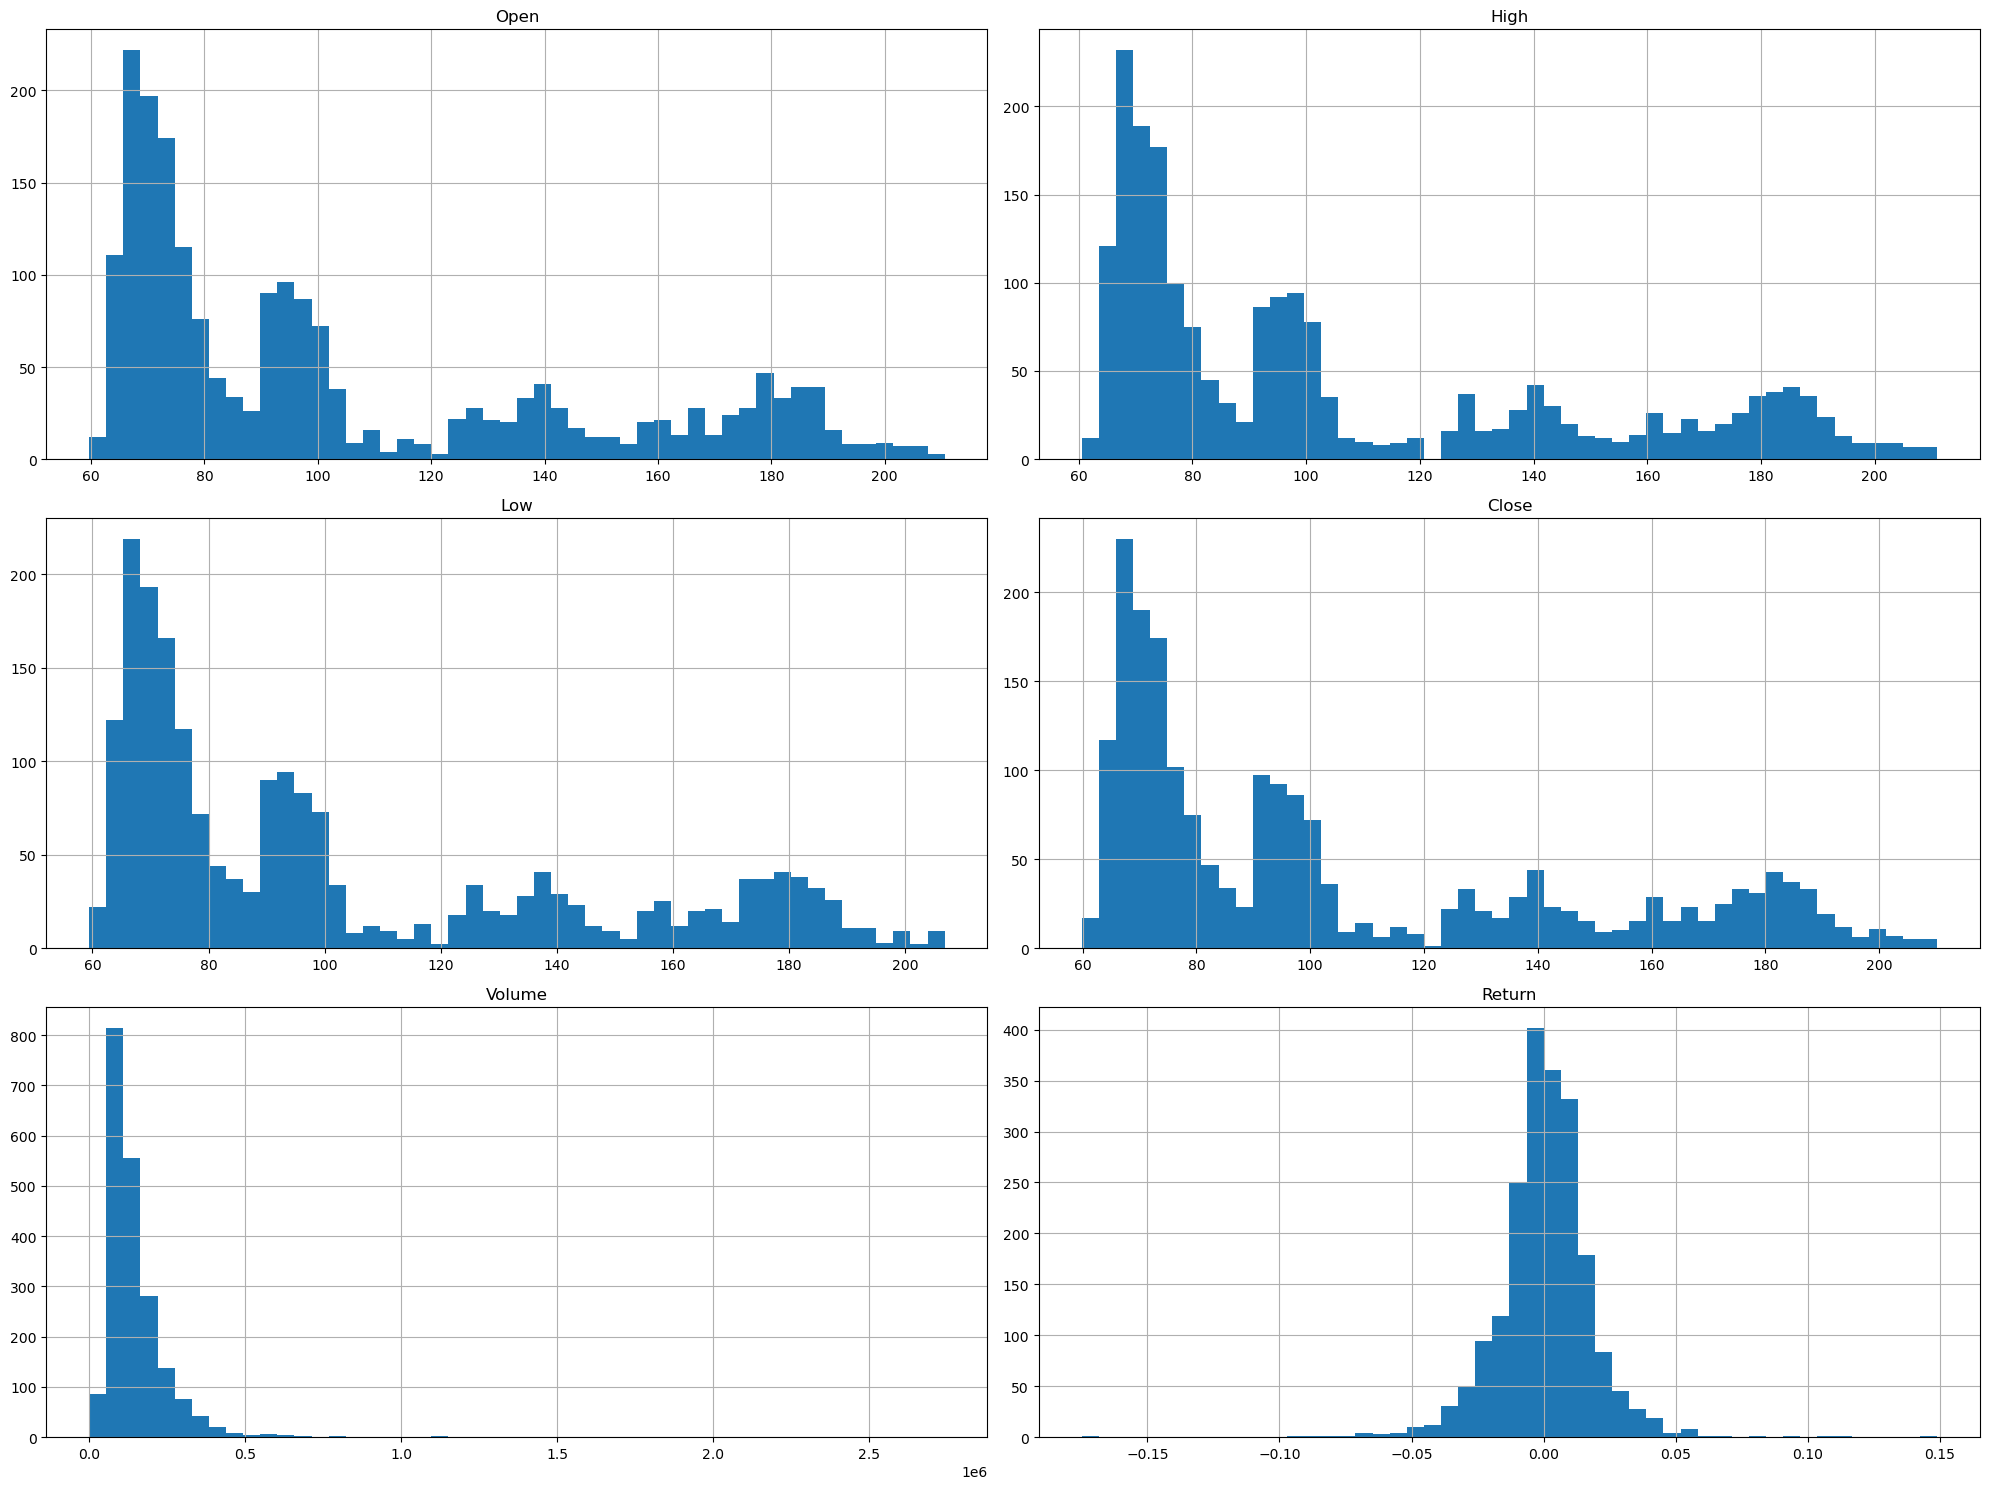

In [ ]:
# Histogramas de las variables
df[num_cols].hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

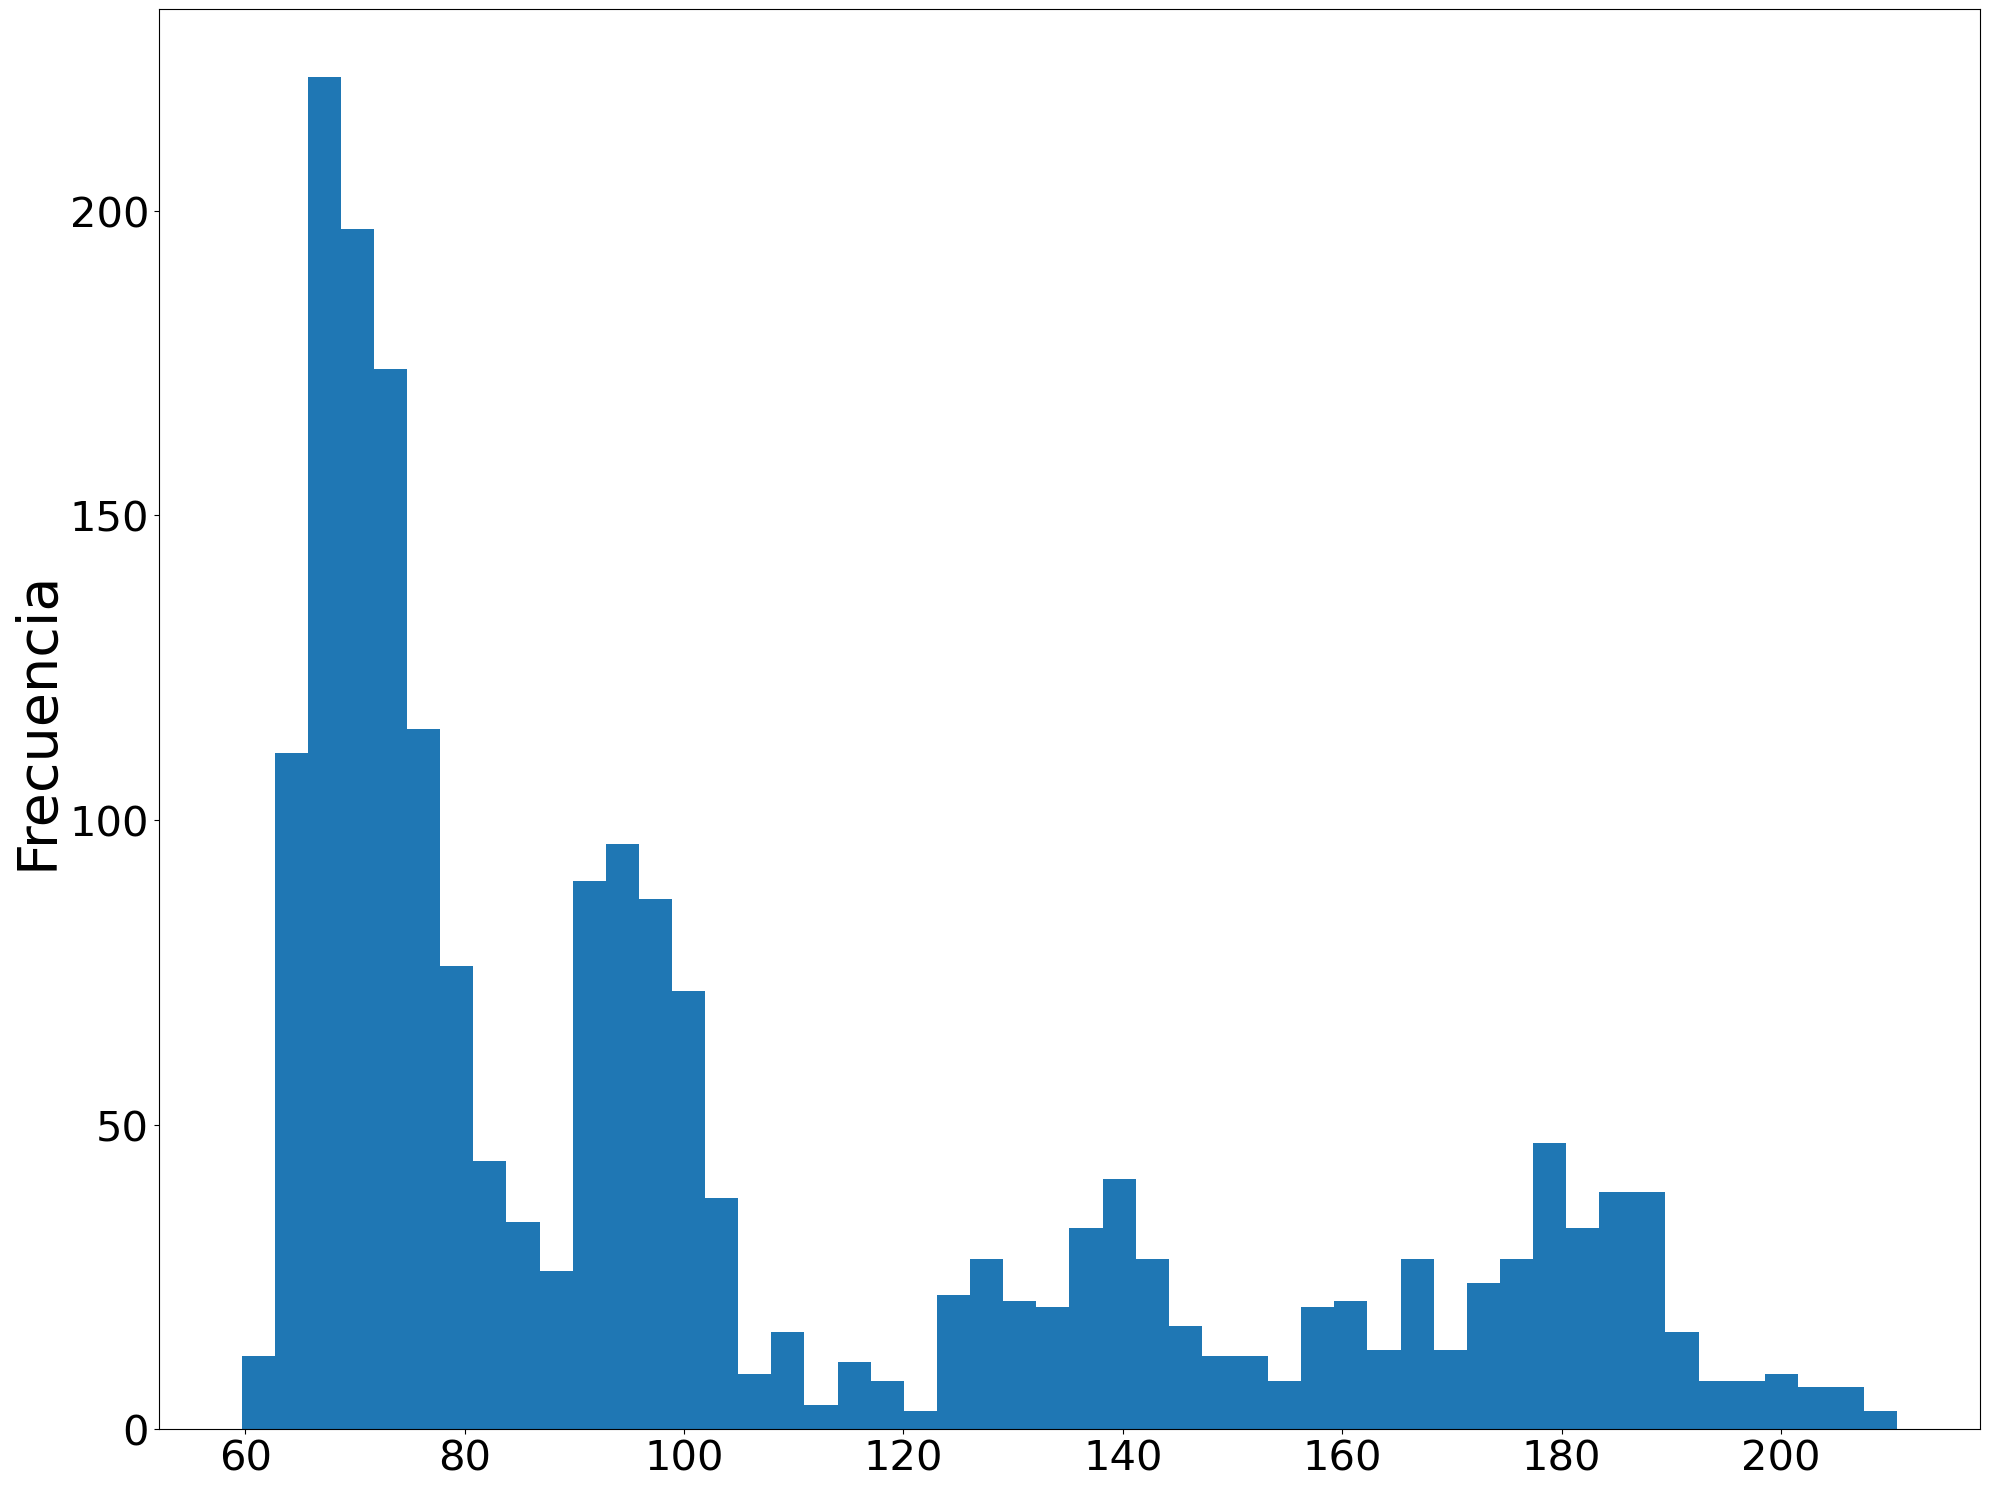

In [ ]:
# Histograma 1: Open
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
plt.hist(df['Open'], bins=50)
#plt.xlabel('Precio de apertura', fontsize=22)
plt.ylabel('Frecuencia', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

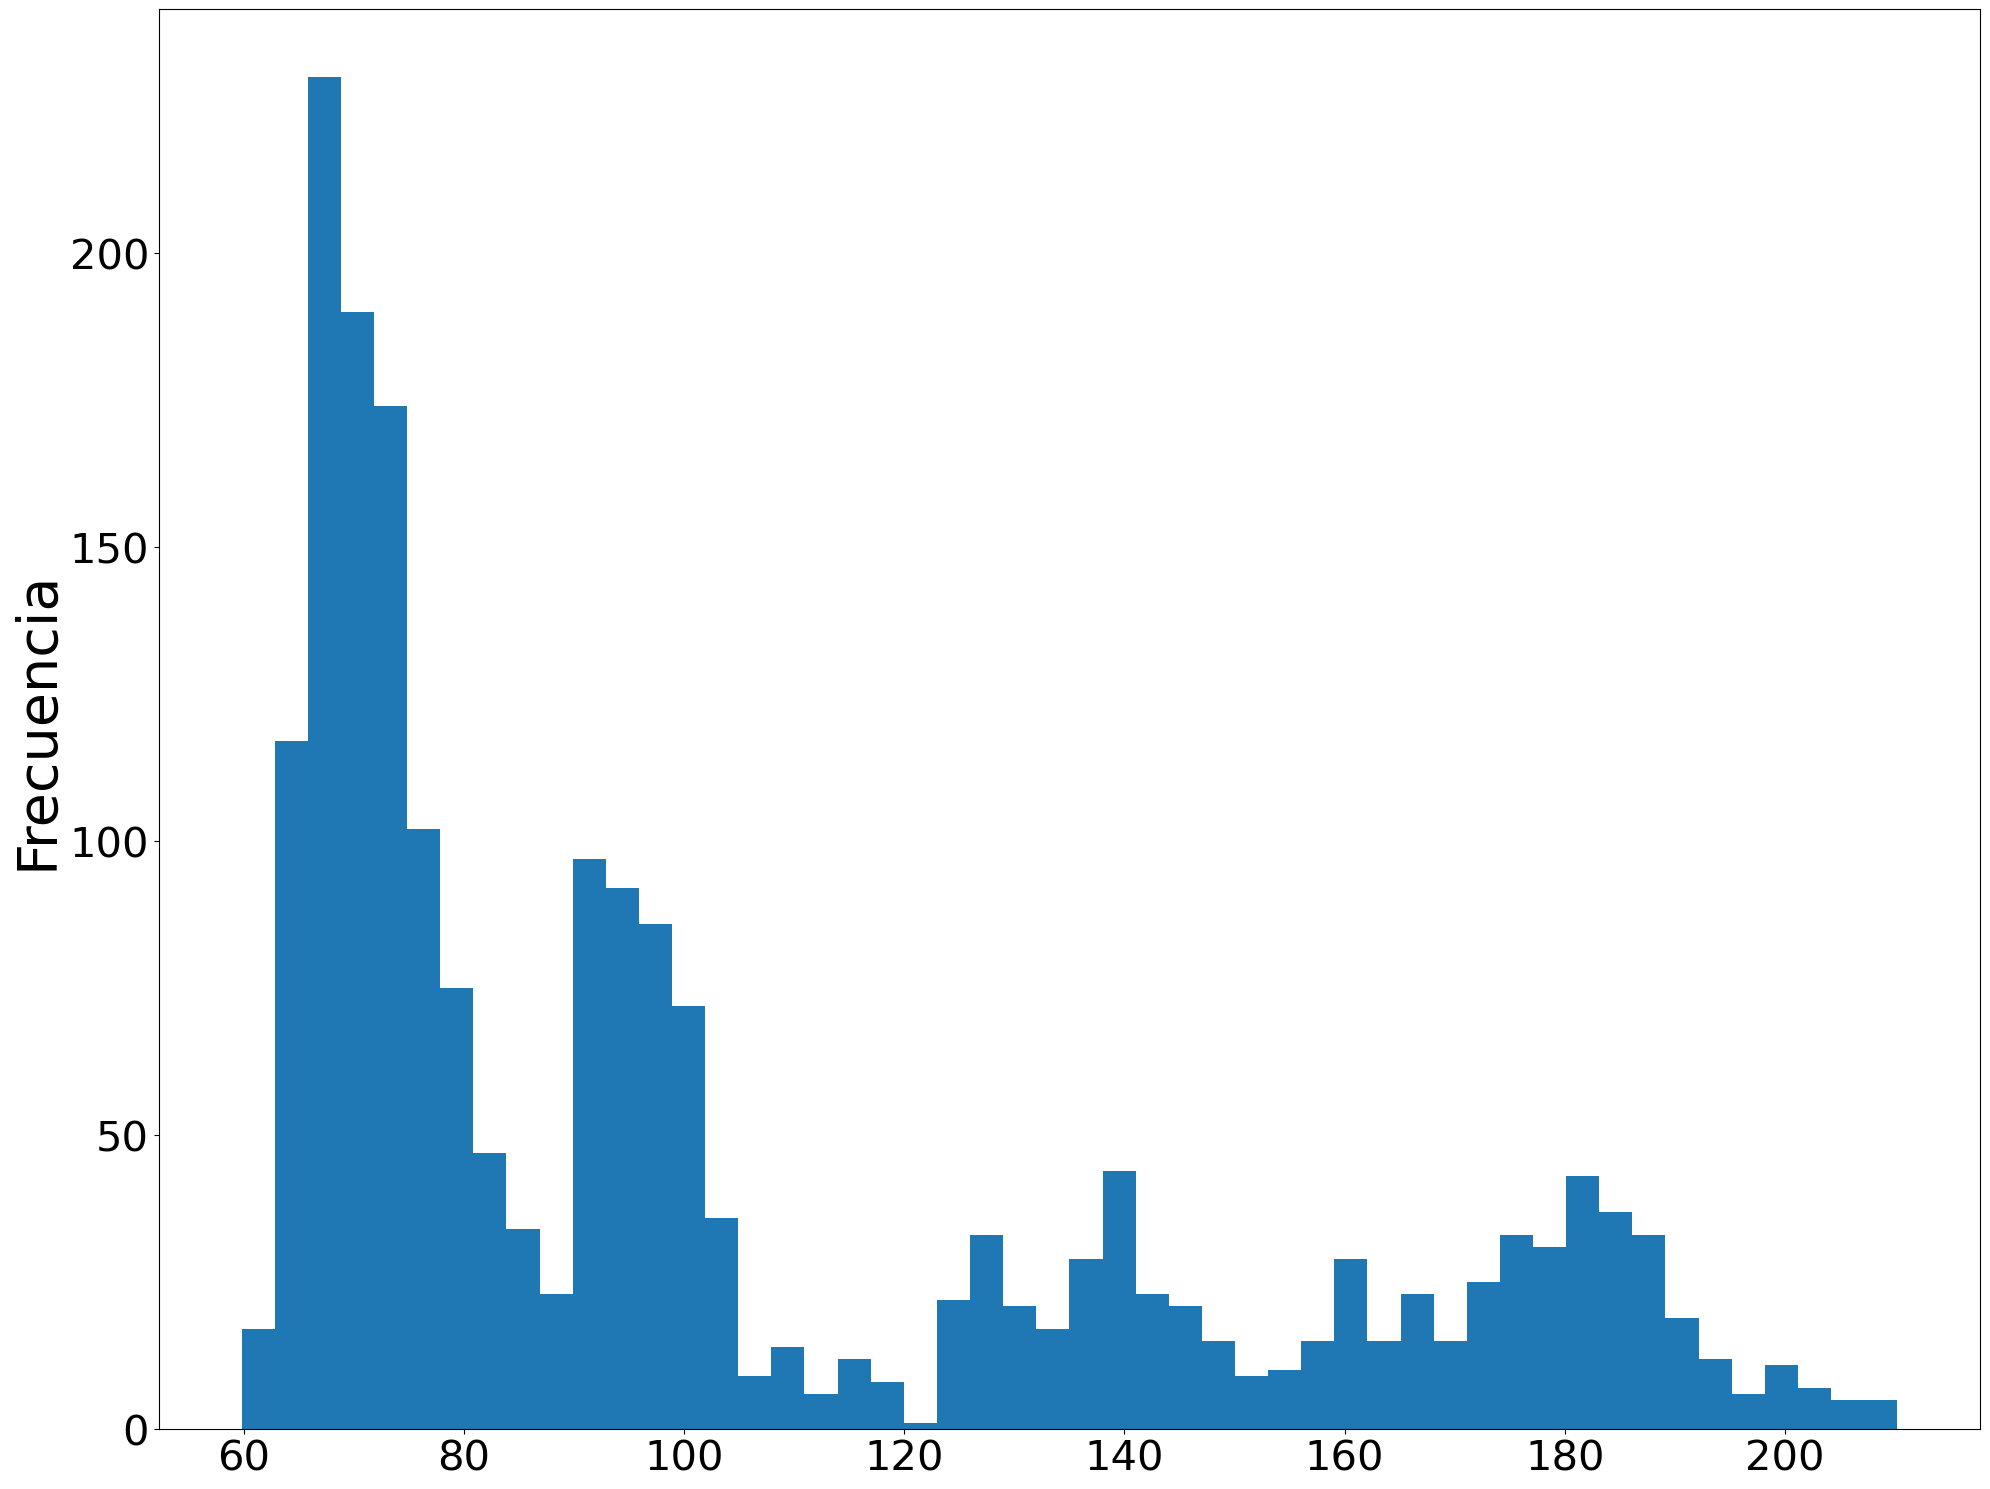

In [ ]:
# Histograma 2: cierre
plt.figure(figsize=(20, 15))
plt.hist(df['Close'], bins=50)
#plt.xlabel('Precio de apertura', fontsize=22)
plt.ylabel('Frecuencia', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

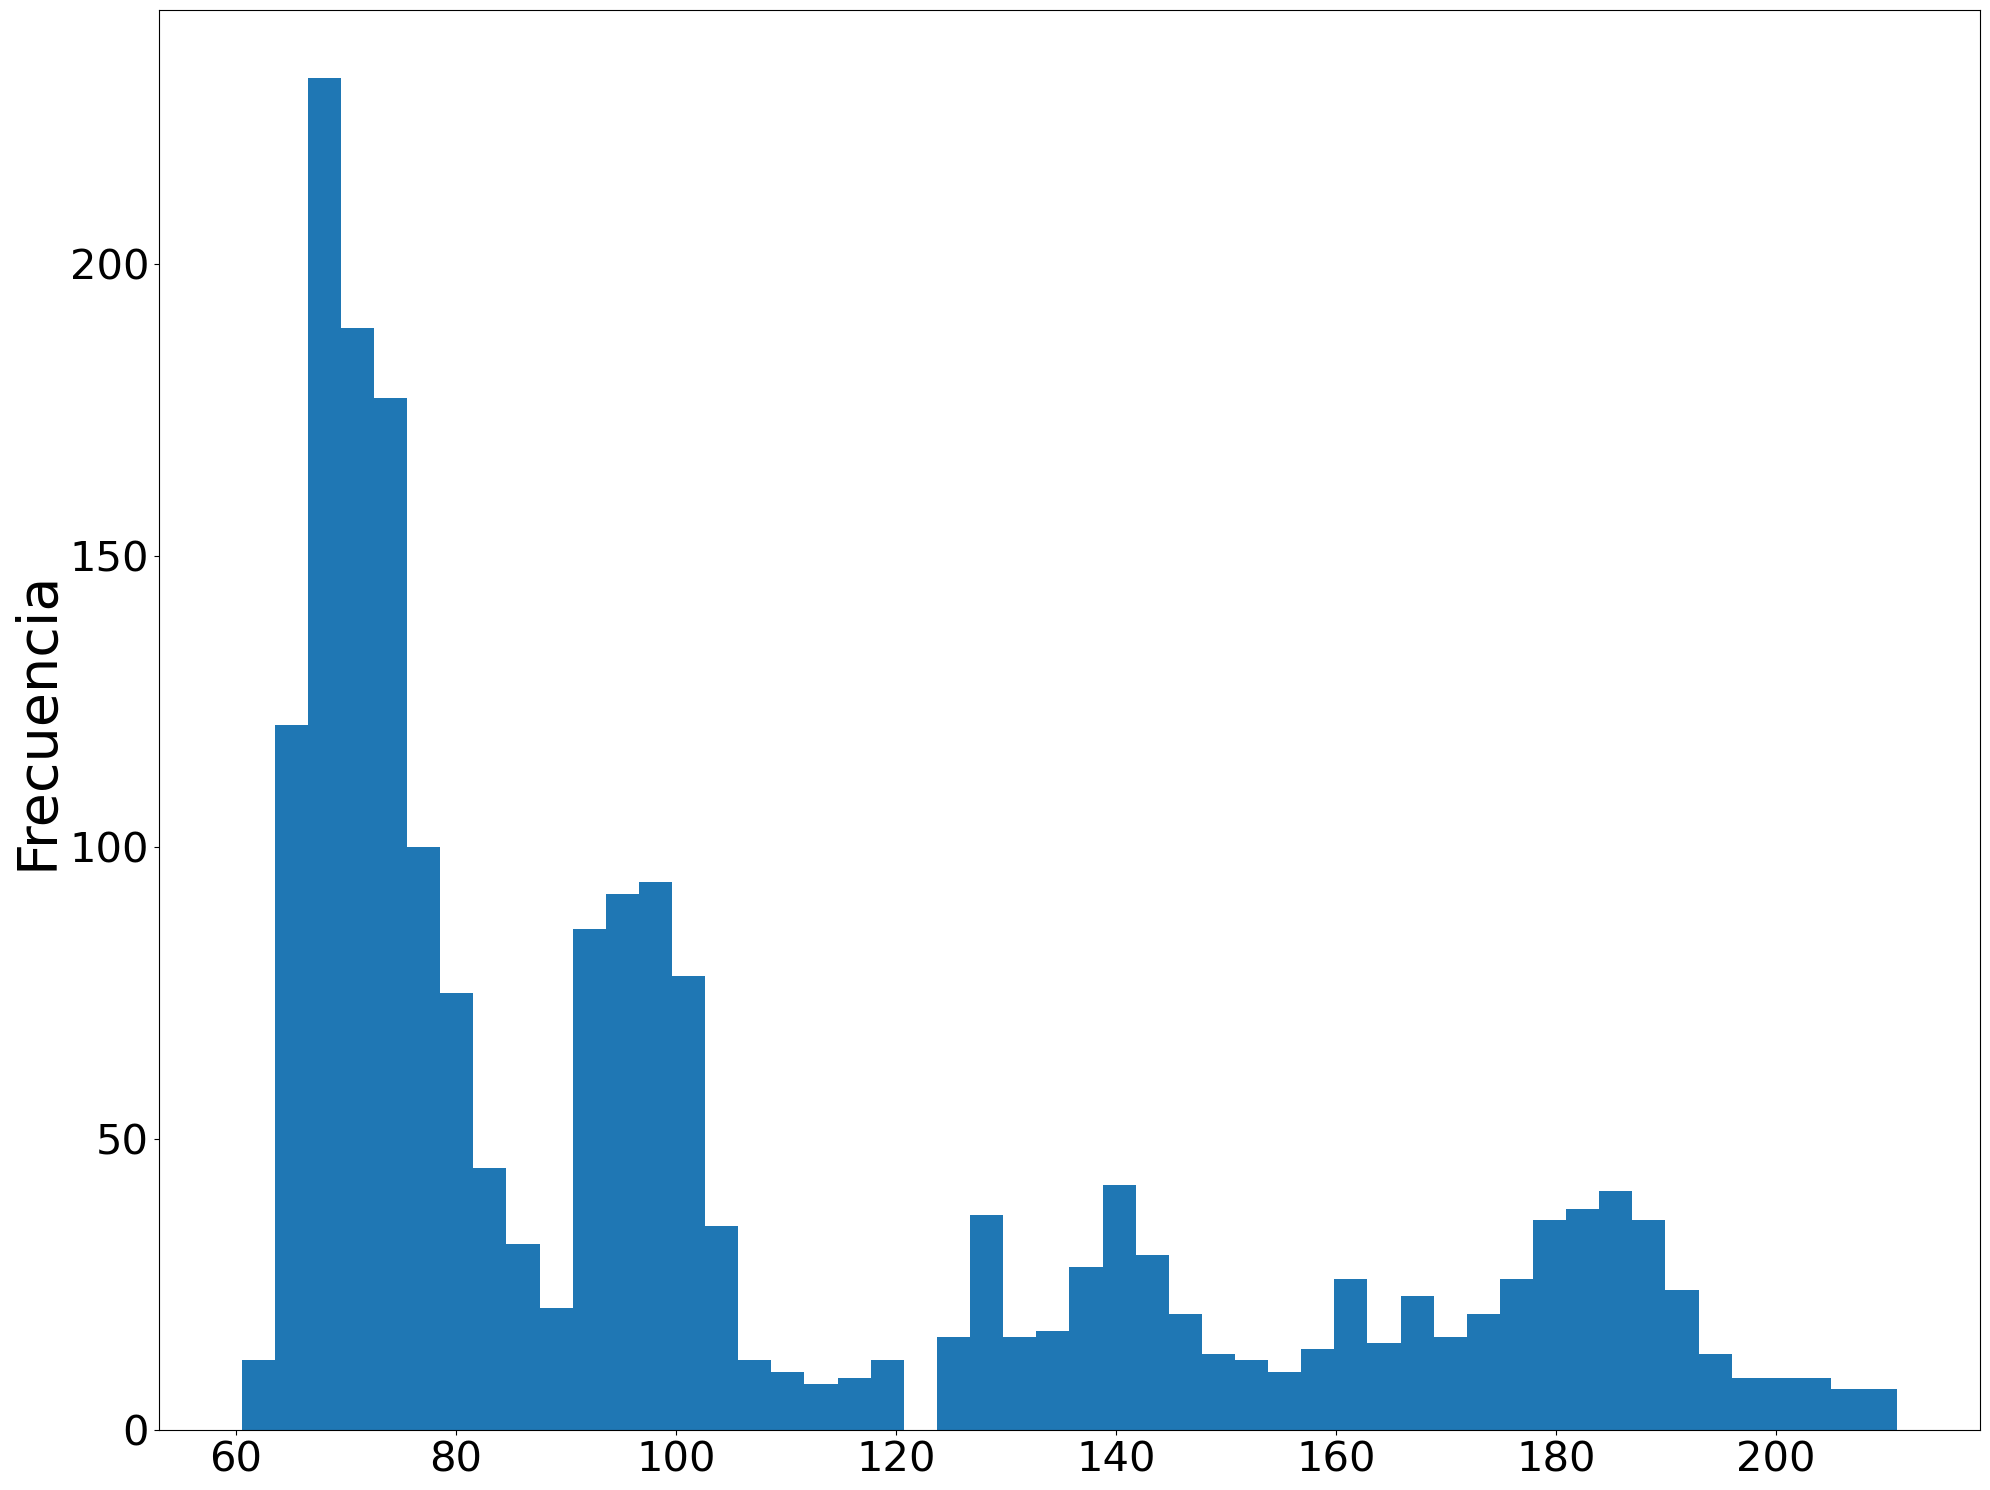

In [ ]:
# Histograma 3: max
plt.figure(figsize=(20, 15))
plt.hist(df['High'], bins=50)
#plt.xlabel('Precio de apertura', fontsize=22)
plt.ylabel('Frecuencia', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

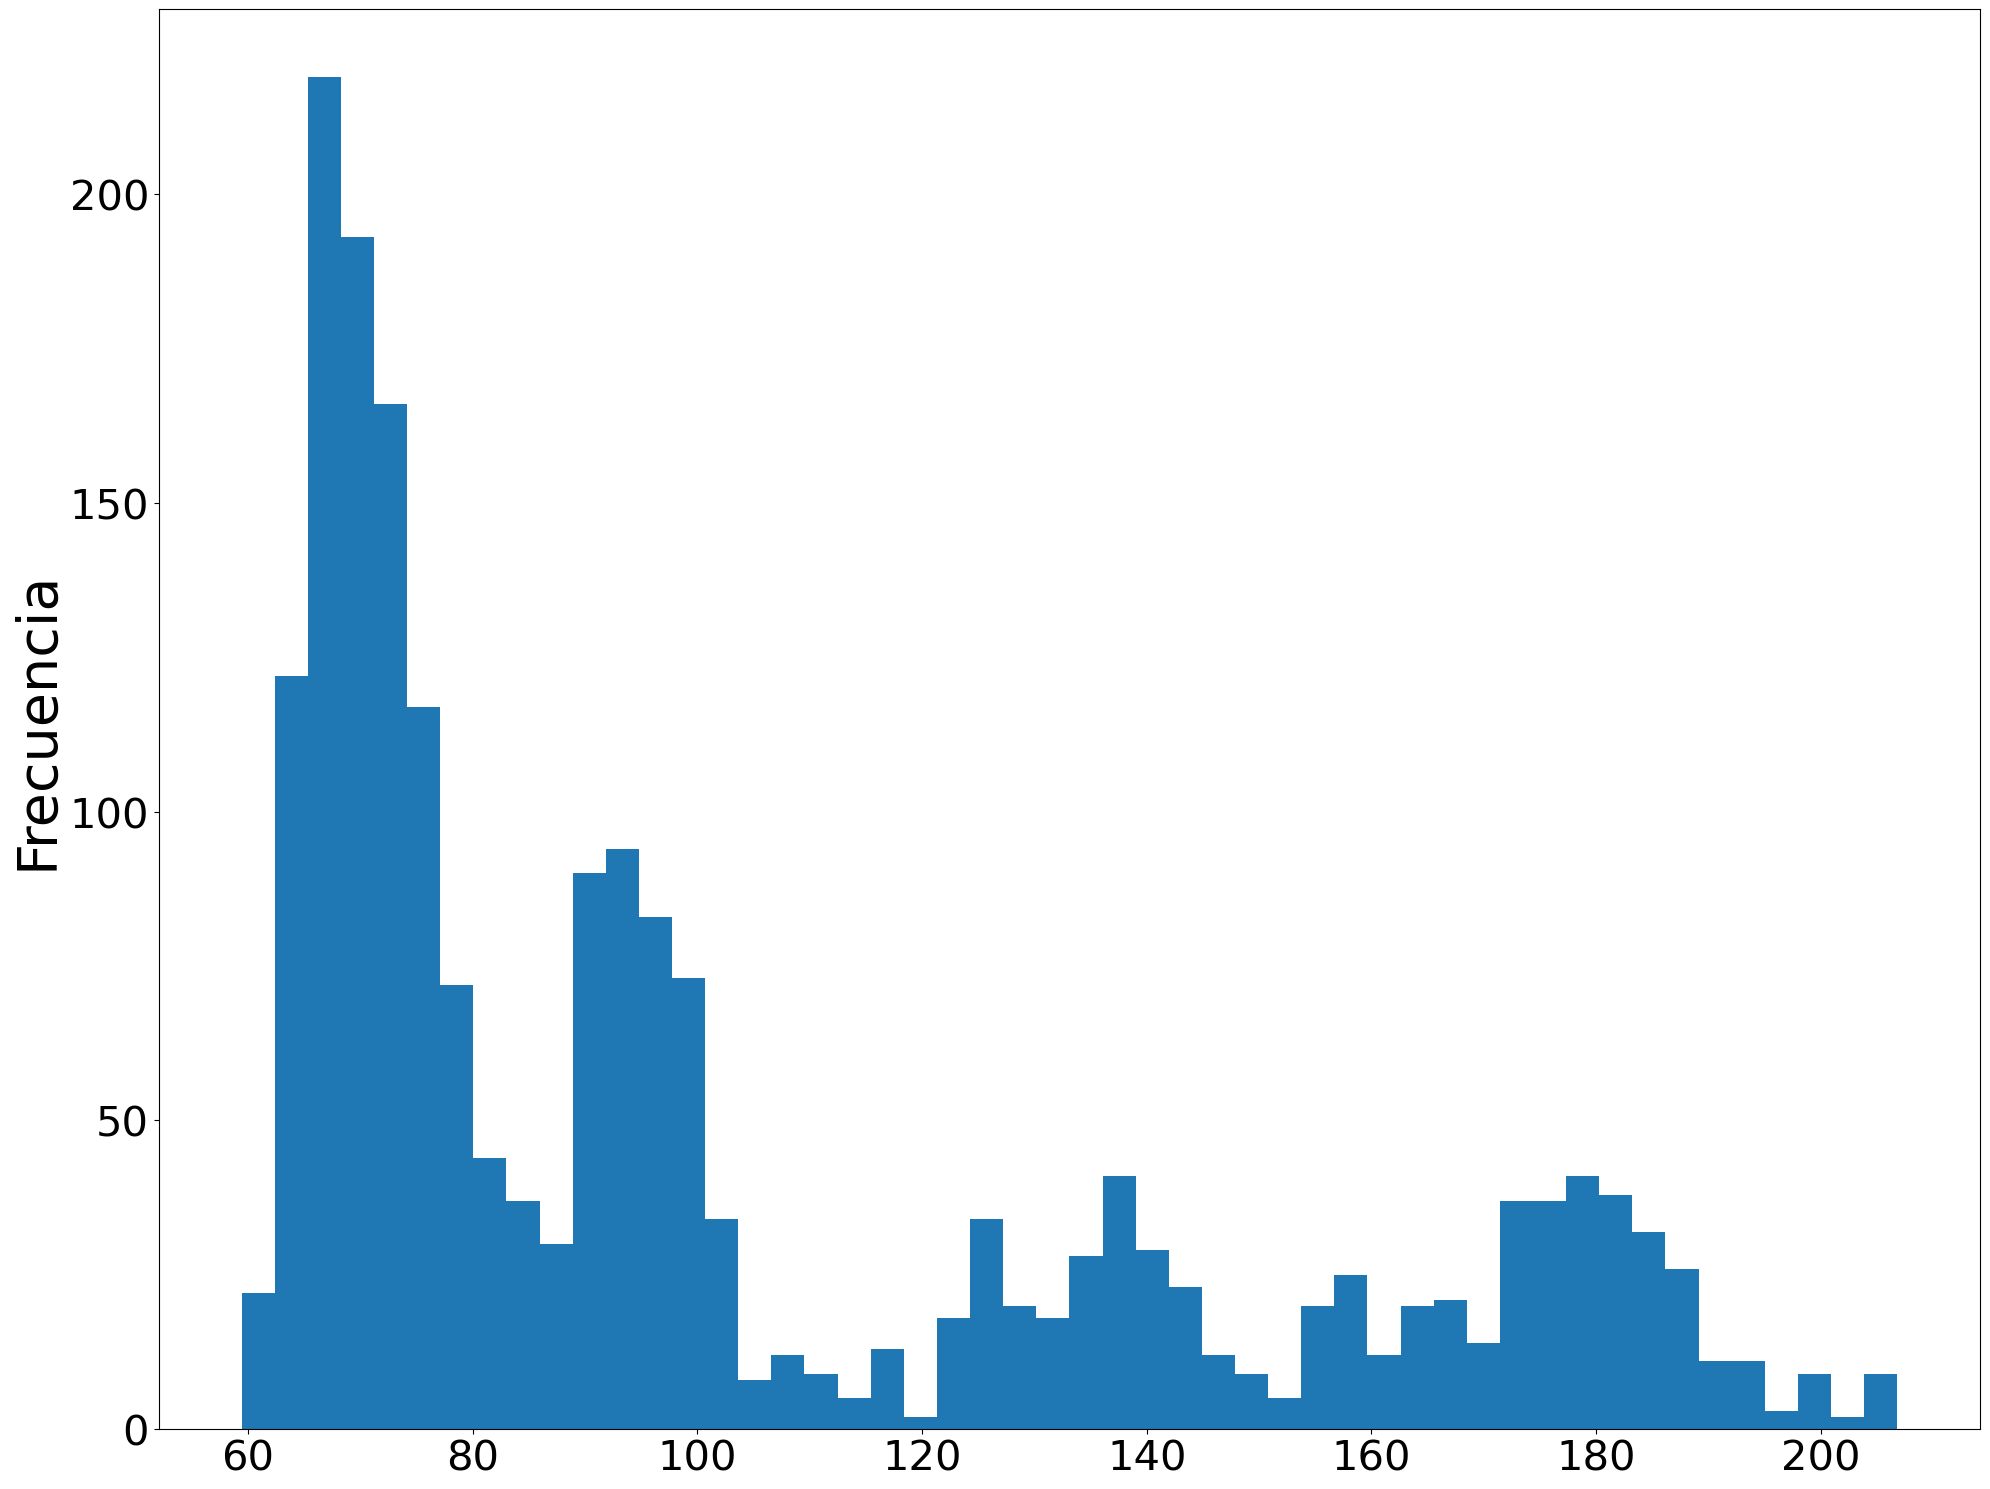

In [ ]:
# Histograma 4: min
plt.figure(figsize=(20, 15))
plt.hist(df['Low'], bins=50)
#plt.xlabel('Precio de apertura', fontsize=22)
plt.ylabel('Frecuencia', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

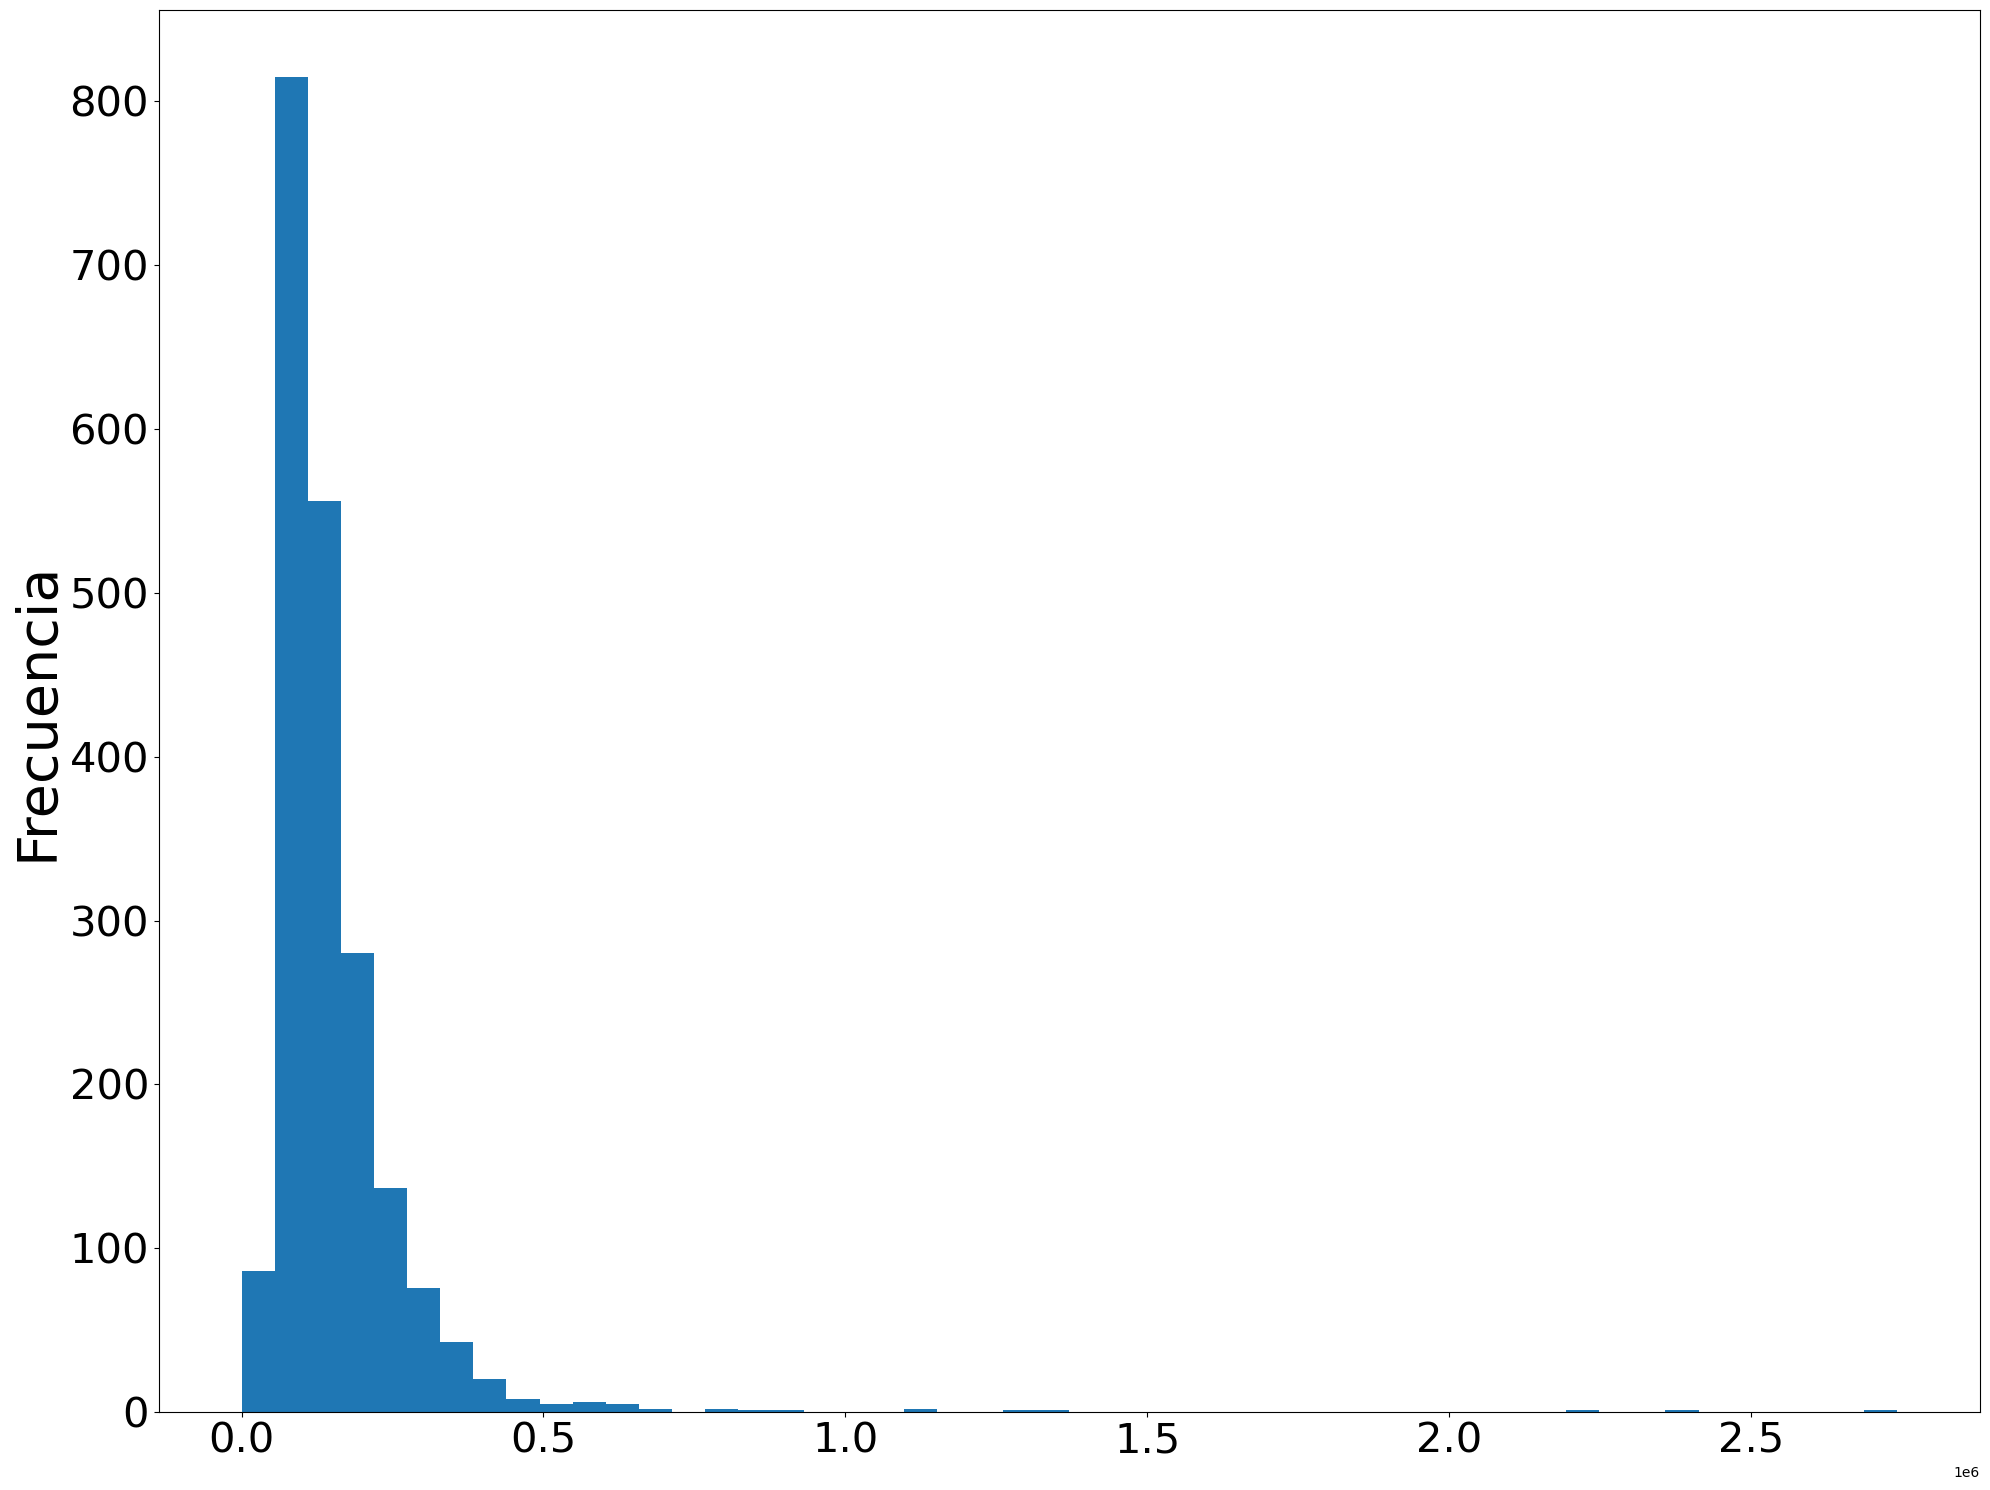

In [ ]:
# Histograma 5: volume
plt.figure(figsize=(20, 15))
plt.hist(df['Volume'], bins=50)
#plt.xlabel('Precio de apertura', fontsize=22)
plt.ylabel('Frecuencia', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

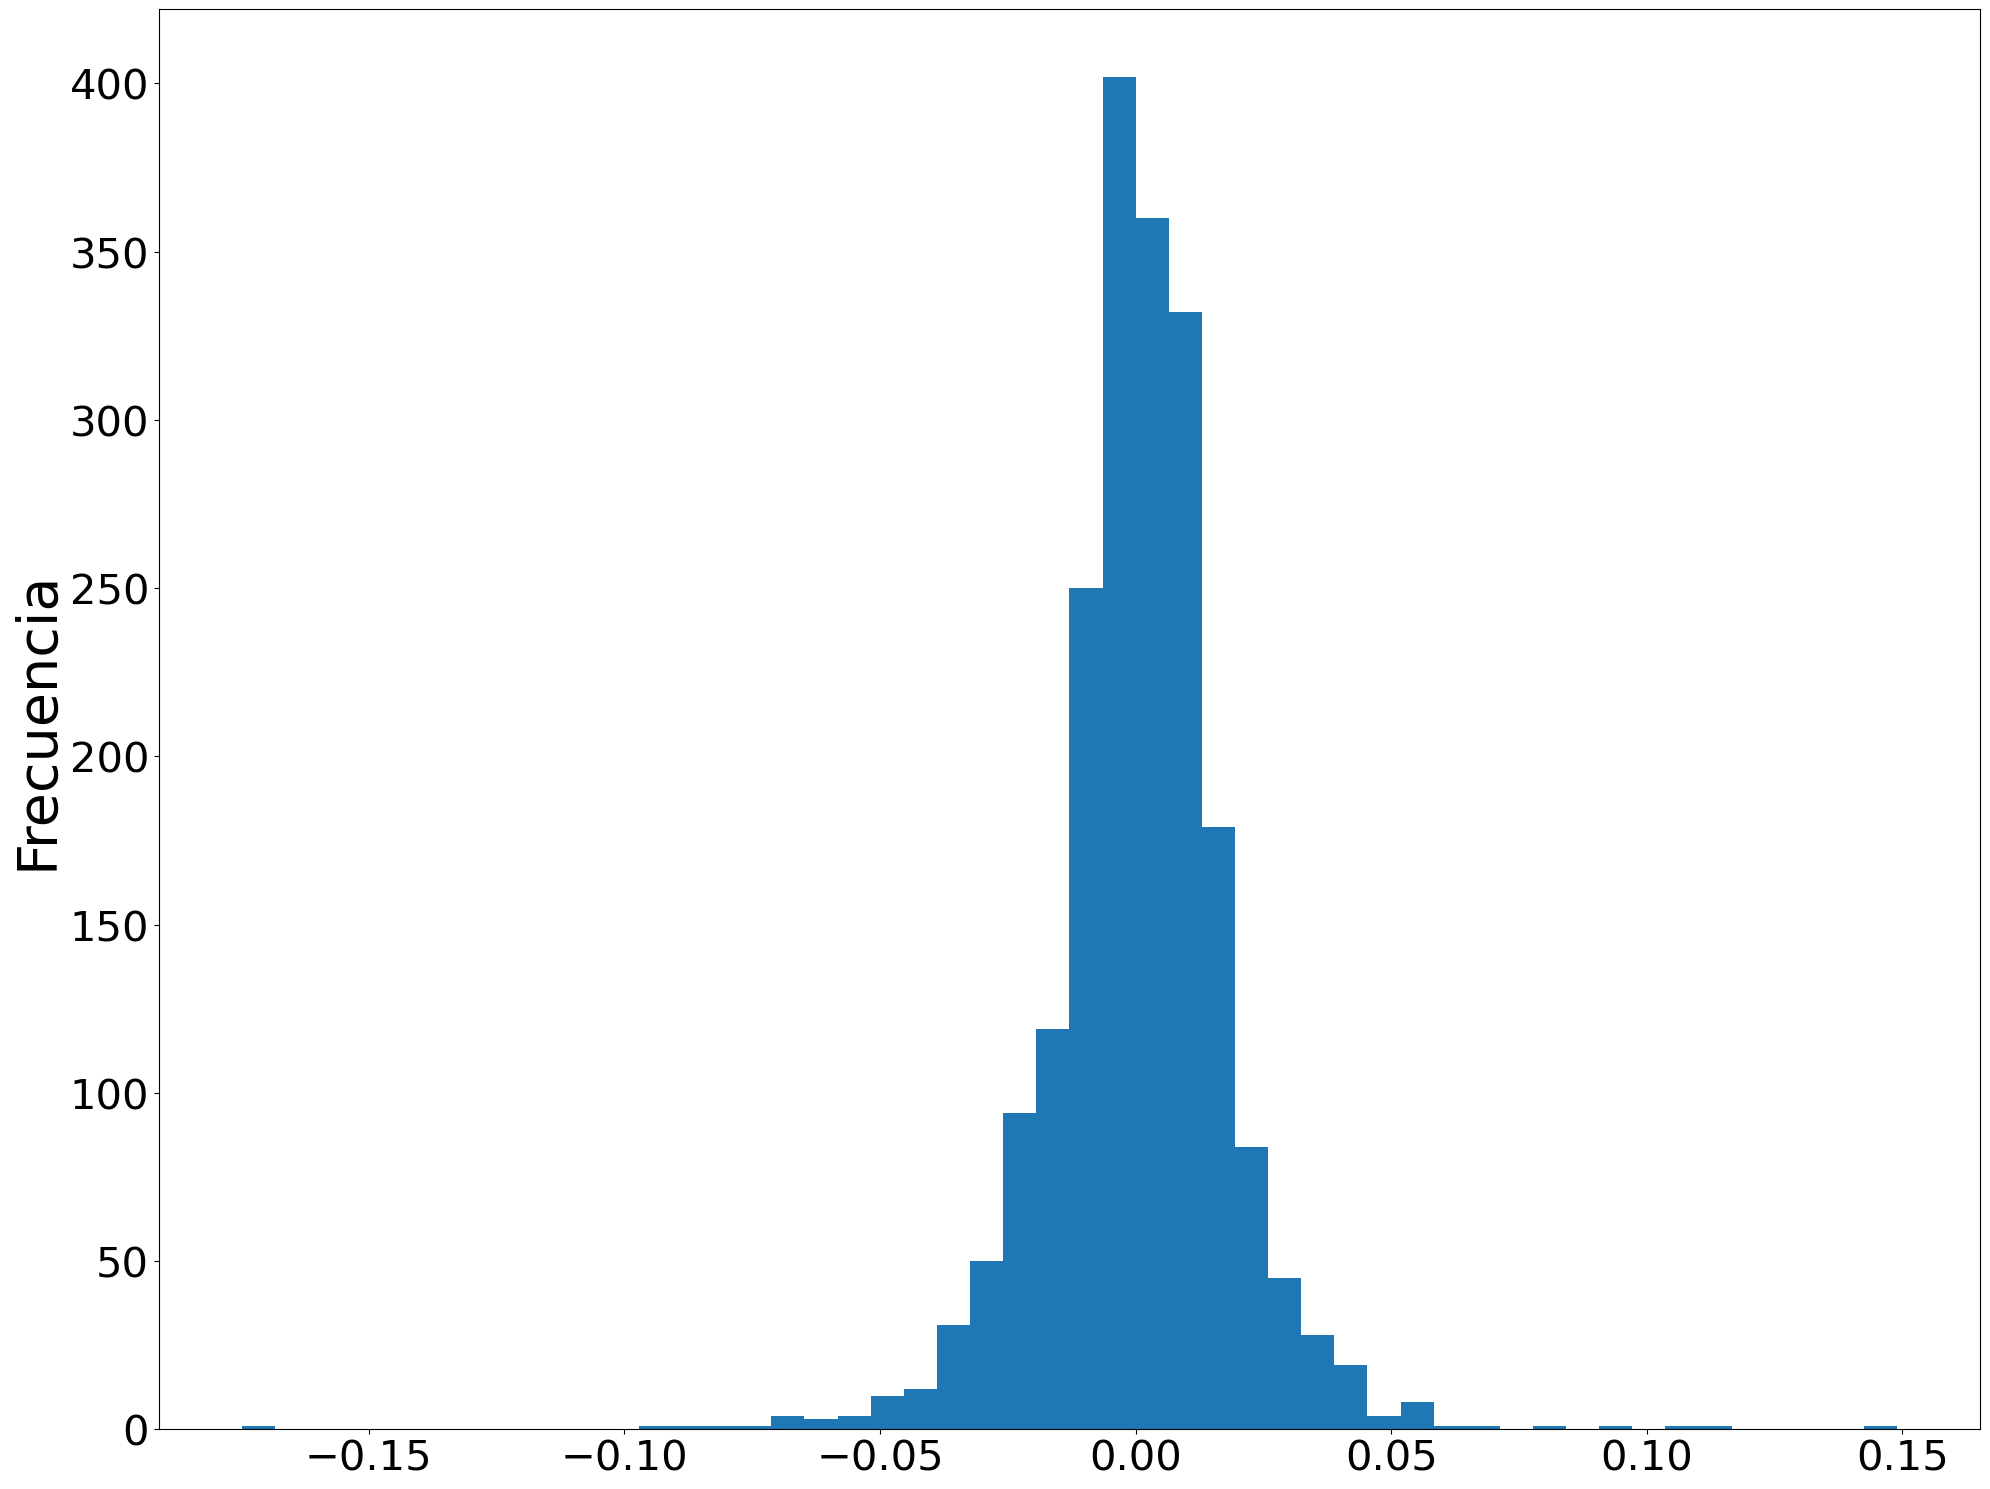

In [ ]:
# Histograma 6: retorno
plt.figure(figsize=(20, 15))
plt.hist(df['Return'], bins=50)
#plt.xlabel('Precio de apertura', fontsize=22)
plt.ylabel('Frecuencia', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

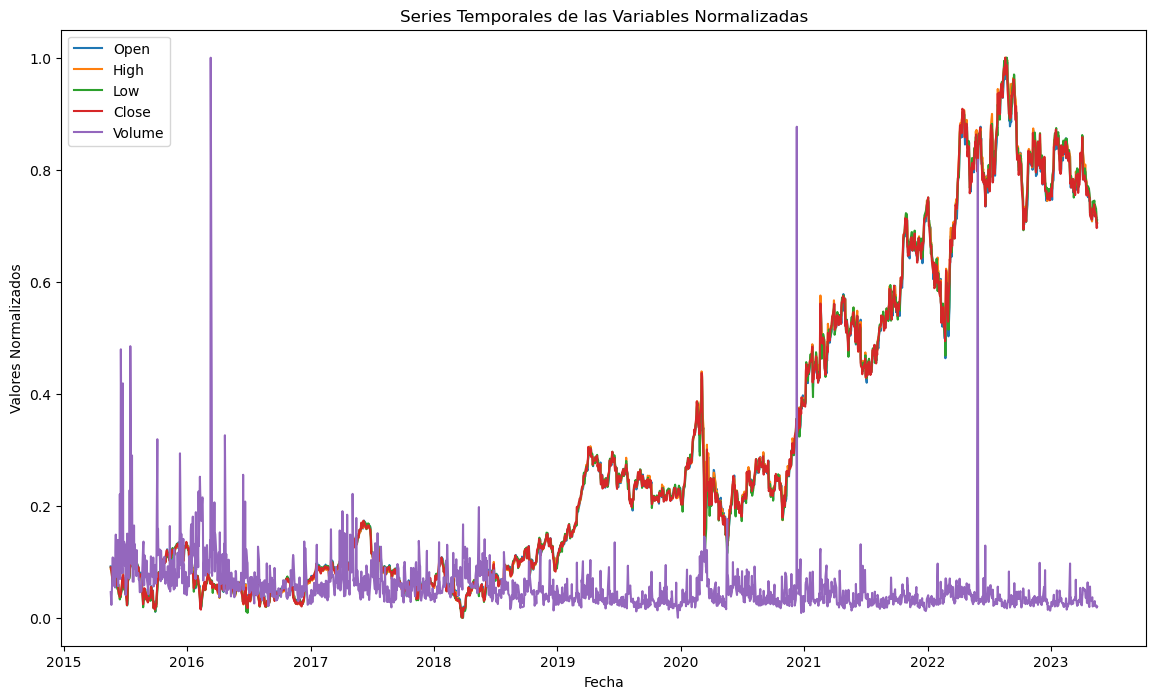

In [ ]:
# Definir las columnas que quieres representar
selected_cols = [col for col in num_cols if col != 'Return'] #Se crea una lista llamada selected_cols que contiene todas las columnas numéricas del dataframe df excepto la columna 'Return'

# Normalizar las columnas numéricas
scaler = MinMaxScaler() #Se crea un objeto scaler de la clase MinMaxScaler para realizar la normalización de los datos
scaled_df = pd.DataFrame(scaler.fit_transform(df[selected_cols]), columns=selected_cols) #Se crea un nuevo dataframe llamado scaled_df que contiene los datos normalizados de las columnas seleccionadas. Se utiliza el método fit_transform del objeto scaler para realizar la normalización

# Agregar la columna 'Date' al dataframe normalizado
scaled_df['Date'] = df['Date'] #Se agrega la columna 'Date' al dataframe scaled_df para mantener la información temporal asociada a los datos normalizados

# Graficar las series temporales de las variables normalizadas
plt.figure(figsize=(14,8))

#Se realiza la visualización de las series temporales de las variables normalizadas mediante la creación de un gráfico. Se recorre cada columna de selected_cols y se traza la serie temporal en el gráfico utilizando los valores de 'Date' como eje x y los valores normalizados como eje y. Finalmente, se añade el título, etiquetas de ejes y leyenda al gráfico antes de mostrarlo
for column in selected_cols:
    plt.plot(scaled_df['Date'], scaled_df[column], label=column)

plt.xlabel('Fecha')
plt.ylabel('Valores Normalizados')
plt.title('Series Temporales de las Variables Normalizadas')
plt.legend()
plt.show()
#aqui no he puesto retorno porque la ser unos datos más diferentes, perdía claridad la visualidazion

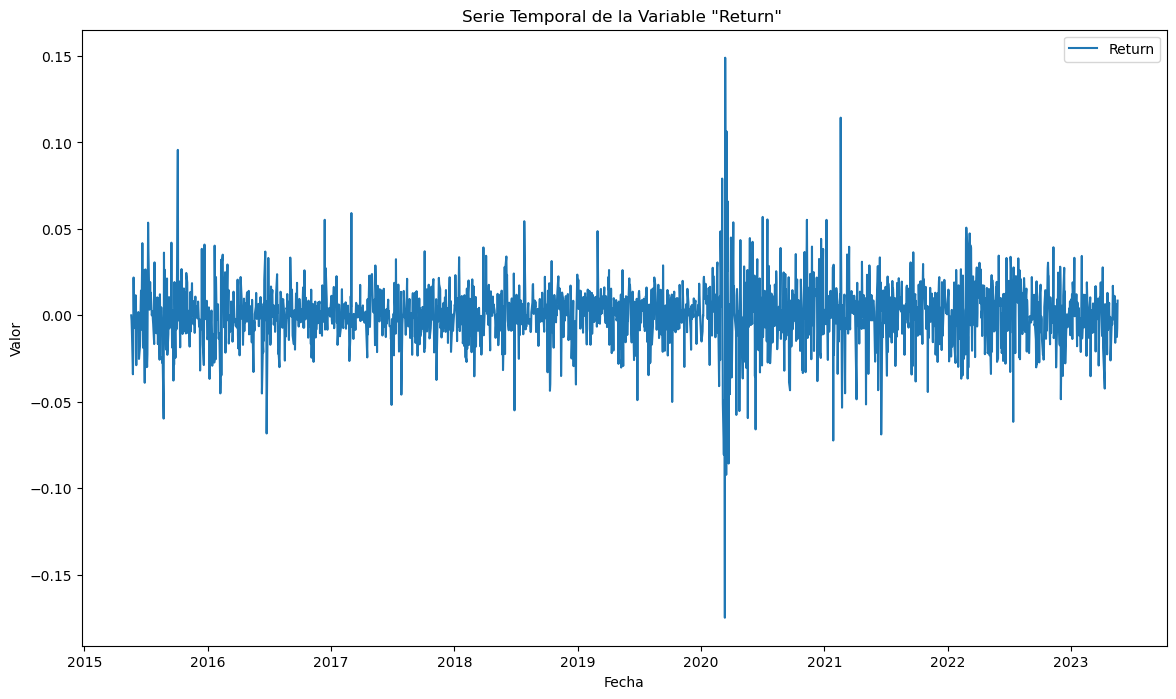

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(df['Date'], df['Return'], label='Return')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal de la Variable "Return" ')
plt.legend()
plt.show()


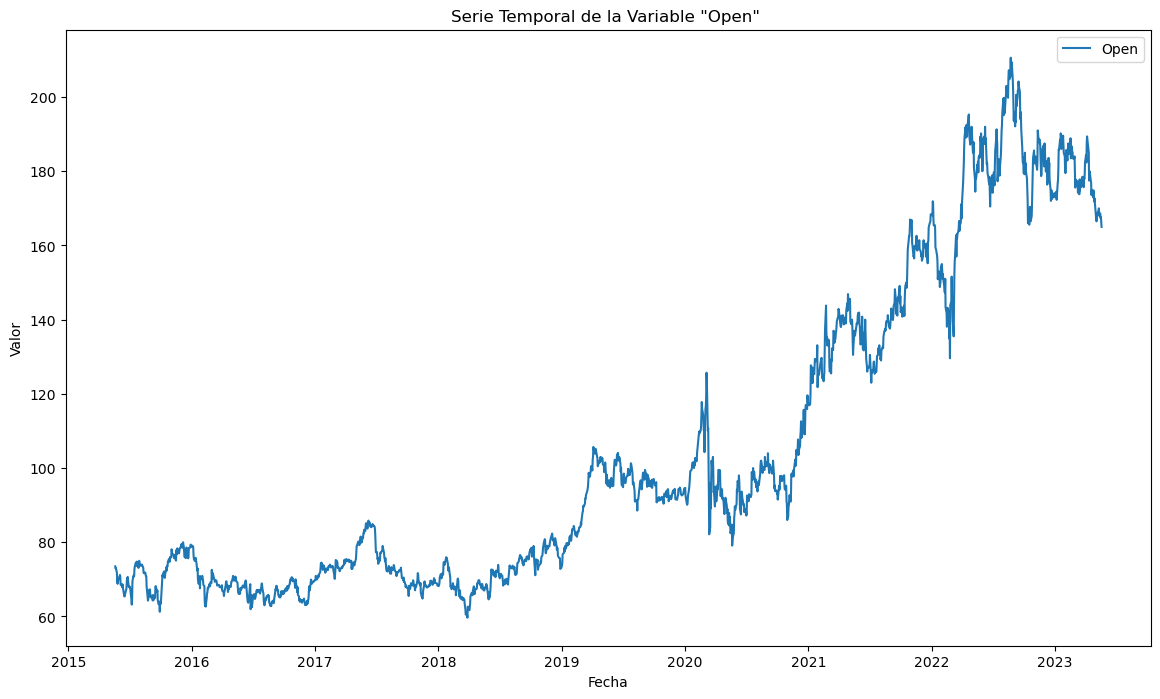

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(df['Date'], df['Open'], label='Open')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal de la Variable "Open" ')
plt.legend()
plt.show()


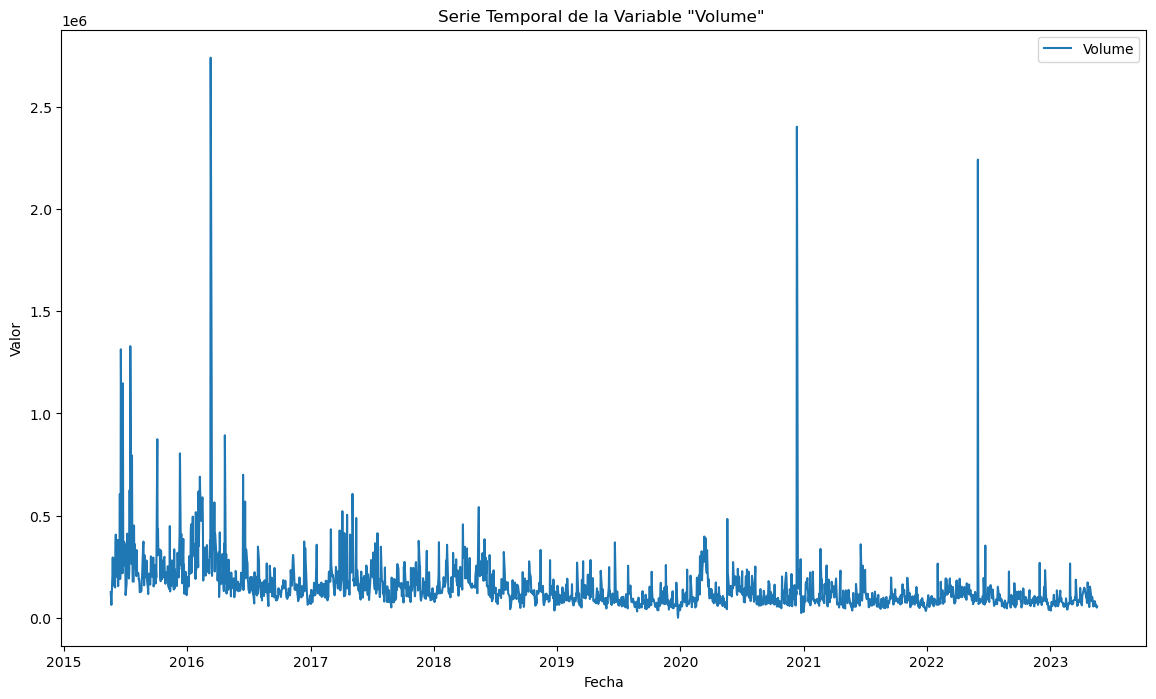

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(df['Date'], df['Volume'], label='Volume')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal de la Variable "Volume" ')
plt.legend()
plt.show()

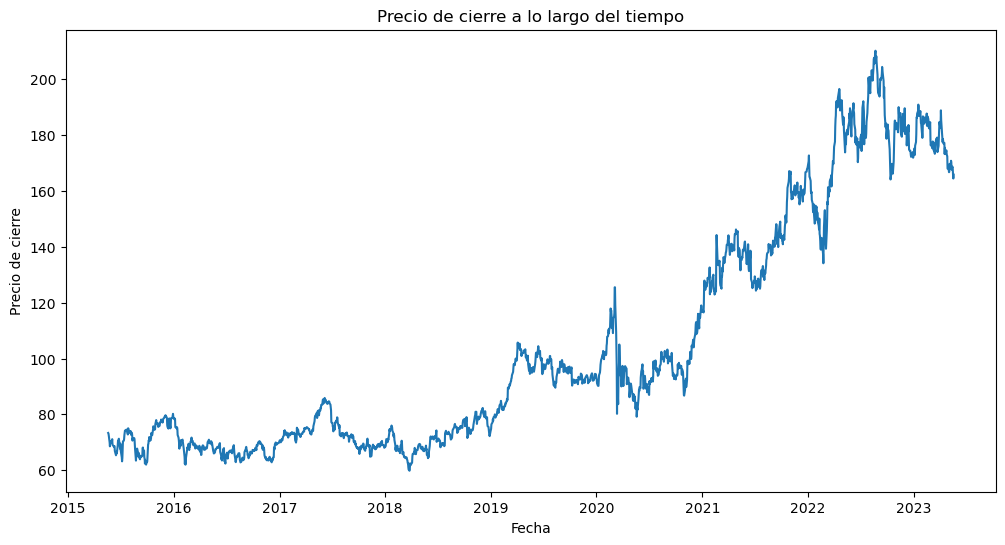

In [ ]:
#VAMOS A MOSTRAT ESTO
# Gráficas de las series temporales
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.title('Precio de cierre a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.show()

In [ ]:
# Gráfico de velas
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(
    yaxis=dict(
        tickfont=dict(size=18),  # Aumenta el tamaño de los números del eje Y
        title="Precio de las acciones [euros]",
        titlefont=dict(size=20)  # Aumenta el tamaño del título del eje Y
    ),
    xaxis=dict(
        tickfont=dict(size=18)  # Aumenta el tamaño de los números del eje X
    )
)

fig.show()

#Este código utiliza la biblioteca plotly para generar un gráfico de velas (candlestick chart) a partir de los datos contenidos en el dataframe df. La visualización resultante muestra información sobre los precios de apertura, cierre, máximo y mínimo de un instrumento financiero en un período de tiempo determinado

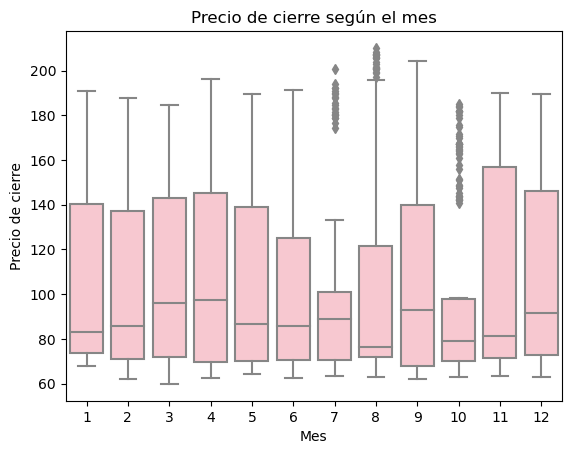

In [ ]:

# Gráficos de cajas para los meses
sns.boxplot(x='Month', y='Close', data=df, color="Pink")
plt.title('Precio de cierre según el mes')
plt.xlabel('Mes')
plt.ylabel('Precio de cierre')
plt.show()

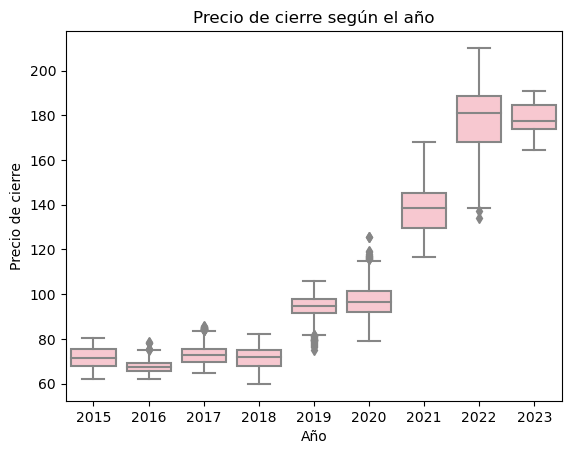

In [ ]:
# Gráficos de cajas para los años

sns.boxplot(x='Year', y='Close', data=df,color="Pink")
plt.title('Precio de cierre según el año')
plt.xlabel('Año')
plt.ylabel('Precio de cierre')
plt.show()

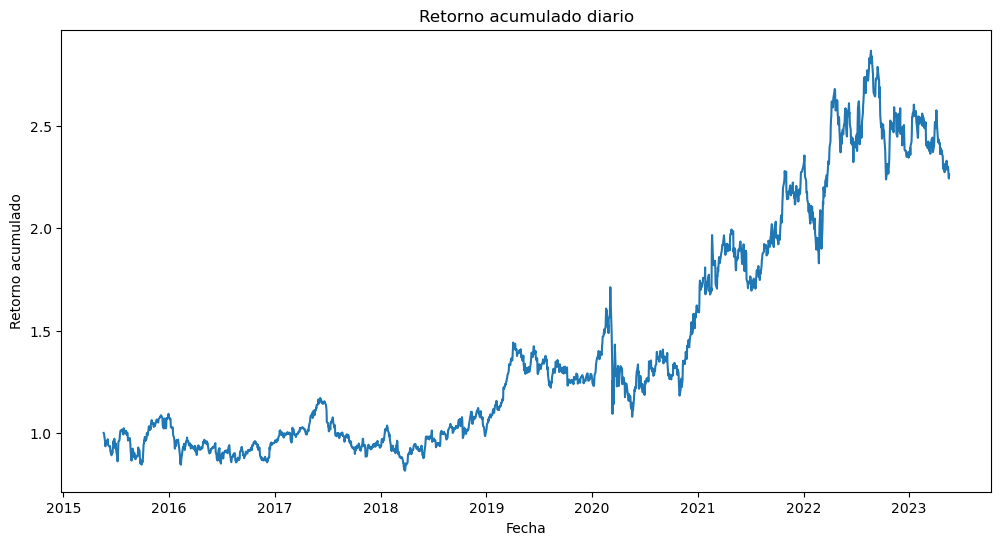

In [ ]:

# Serie temporal  del Retorno acumulado diario
df['Cumulative Return'] = (1 + df['Return']).cumprod()
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Cumulative Return'])
plt.title('Retorno acumulado diario')
plt.xlabel('Fecha')
plt.ylabel('Retorno acumulado')
plt.show()


## Implementación de los modelos con mejores resultados


En este código se va a detallar la explicación de la arquitectura llevada a cabo sobre el modelo LSTM. El resto de implemetaciones se encuentran en sus archivos. La explicación del código es general para todos, las principales diferencias se basan en la implementación de una nueva capa y en su unión con una arquitectura CNN, lo que se va a ir viendo poco a poco

### Vanilla LSTM

In [ ]:
## preprocesamiento de datos para el modelo de RNN LSTM
# Este es un modelo que predice un valor en el tiempo t+1 basado en los valores de las observaciones en el tiempo t, t-1, t-2, etc.

#Preparación general para todos los modelos
#Este código es parte de la preparación general para todos los modelos de pronóstico que utilicen la misma estructura de datos.

# Normalizamos los datos. Se utiliza el objeto MinMaxScaler de la biblioteca sklearn.preprocessing para normalizar los datos. Esto es importante para asegurar que todas las características tengan la misma escala y evitar que alguna característica tenga un peso desproporcionado en el modelo.
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Dividimos los datos en entrenamiento y prueba. La variable train_size indica el tamaño del conjunto de entrenamiento, que corresponde al 60% de los datos totales. La variable test_size indica el tamaño del conjunto de prueba, que corresponde al 40% de los datos totales. Estos porcentajes pueden ser ajustados según tus necesidades. Los datos se dividen en las variables train y test utilizando la técnica de "slicing" de Python.

train_size = int(len(scaled_data) * 0.6) #esto lo voya cambiar por 70/30 para evitar sobreajuste
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

#En resumen, este código realiza la normalización de los datos, divide los datos en conjuntos de entrenamiento y prueba, y proporciona una función para crear el conjunto de datos de entrenamiento con las secuencias de longitud look_back necesarias para el pronóstico.

# Seleccionamos la columna 'Close'
data = df['Close'].values.reshape(-1,1)


# Función para crear el dataset de entrenamiento. Esta función se utiliza para crear el conjunto de datos de entrenamiento. Recibe como parámetro dataset, que es un arreglo de datos en formato numpy. La variable look_back indica el número de pasos anteriores que se utilizan como características de entrada para predecir el siguiente paso. La función itera sobre el conjunto de datos y crea dos arreglos: dataX y dataY. dataX contiene las secuencias de longitud look_back de los datos de entrada, y dataY contiene los valores objetivo correspondientes al siguiente paso después de la secuencia. Estos conjuntos de datos se convierten en arreglos numpy y se devuelven como salida de la función.

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Creamos el dataset de entrenamiento (train set)
look_back = 30 #aqui cambio la cantidad de días que quiero que mire hacia atras para entrenar el modelo. En este caso se mantienen los 60 días de ventana temporal que son los que mejores predicciones han dado en compraración con el resto
X_train, y_train = create_dataset(train, look_back)

# Creamos el dataset de prueba (test set)
X_test, y_test = create_dataset(test, look_back)

# Convertimos los datos a arreglos de numpy para la fomra en la que tienen que entrar en el modelo. La nueva forma de los conjuntos de datos será (número_de_muestras, 1, número_de_características). Este cambio en la forma es comúnmente requerido por ciertos modelos de aprendizaje automático, como las redes neuronales recurrentes (RNN), en las que se espera que los datos de entrada tengan una estructura tridimensional
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])) #Se está modificando la forma de los conjuntos de datos de modo que se agregue una dimensión adicional
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])) # Para agregar una dimensión adicional en la posición 1 de los conjuntos de datos. El nuevo tamaño de esta dimensión se establece en 1, mientras que el tamaño de la dimensión original se mantiene sin cambios


## Modelo de RNN LSTM
# Definimos el modelo
model = Sequential() #Se crea un modelo secuencial vacío donde se agregarán las capas una por una
model.add(LSTM(16, input_shape=(1, look_back)))# Aquí es donde se seleccionan las 32 neuronas que han dado el mejor resultado en comparación con el resto de modelos. Se agrega una capa LSTM al modelo con 32 unidades (neuronas). El parámetro input_shape especifica la forma de entrada de los datos, que en este caso es (1, look_back). Esto significa que el modelo espera una secuencia unidimensional de longitud look_back en cada muestra de entrada
model.add(Dense(1)) # Se agrega una capa densa al modelo con 1 unidad. Esta capa tiene una conexión completamente conectada, lo que significa que cada unidad en la capa anterior está conectada a cada unidad en esta capa. La capa densa se utiliza para producir la salida del modelo
model.compile(loss='mean_squared_error', optimizer='adam') # Se compila el modelo especificando la función de pérdida (mean_squared_error, que calcula el error cuadrático medio) y el optimizador (adam, un algoritmo de optimización popular). El objetivo es minimizar la pérdida durante el entrenamiento.

from keras.callbacks import EarlyStopping
# simple early stopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1) #Se crea una instancia de EarlyStopping especificando el parámetro monitor como 'loss', lo que significa que se monitoreará la pérdida durante el entrenamiento. El parámetro mode se establece en 'min', lo que indica que se busca minimizar la pérdida. El parámetro verbose se establece en 1 para que se muestren mensajes informativos durante el proceso.

# Entrenamos el modelo
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1, callbacks=[es]) #batch 16 y epoch 50. Se entrena el modelo utilizando los datos de entrenamiento X_train e y_train. Se especifica el número de épocas (epochs) como 50 y el tamaño del lote (batch_size) como 16. El argumento callbacks se establece como [es], lo que significa que se utilizará el criterio de parada anticipada definido anteriormente.

# Hacemos las predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertimos las predicciones, es decir, que vuelven a mostrar su valor real. Es por eso que al principio hemos normalizado las variables de apertura y cierre separadamente. Para no tener que desnormalizar todo ahora sino solo las de cierre.
train_predict = scaler.inverse_transform(train_predict) #Se aplica la función inverse_transform del objeto scaler a train_predict, que contiene las predicciones del modelo para los datos de entrenamiento. Esta operación revierte la normalización y devuelve los valores originales en la escala original.
y_train = scaler.inverse_transform([y_train]) #Se aplica la función inverse_transform del objeto scaler a y_train, que contiene los valores reales correspondientes a los datos de entrenamiento. Al igual que en el paso anterior, se revierte la normalización y se obtienen los valores originales.
test_predict = scaler.inverse_transform(test_predict) #Se realiza la desnormalización de las predicciones del modelo para los datos de prueba test_predict.
y_test = scaler.inverse_transform([y_test]) #Se aplica la función inverse_transform del objeto scaler a y_test, que contiene los valores reales correspondientes a los datos de prueba.



In [ ]:
# Calcular las métricas para el conjunto de entrenamiento
rmse_train = np.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
mae_train = mean_absolute_error(y_train[0], train_predict[:,0])
r2_train = r2_score(y_train[0], train_predict[:,0])

# Calcular las métricas para el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
mape_test = mean_absolute_percentage_error(y_test[0], test_predict[:,0])
mae_test = mean_absolute_error(y_test[0], test_predict[:,0])
r2_test = r2_score(y_test[0], test_predict[:,0])

# Crear un DataFrame para visualizar los resultados
results = pd.DataFrame({'Set': ['Entrenamiento', 'Prueba'],
                        'RMSE': [rmse_train, rmse_test],
                        'MAE': [mae_train, mae_test],
                        'R2': [r2_train, r2_test]})
print(results)


             Set      RMSE      MAE        R2
0  Entrenamiento  2.702091  2.09132  0.950446
1         Prueba  5.717770  4.49759  0.972541


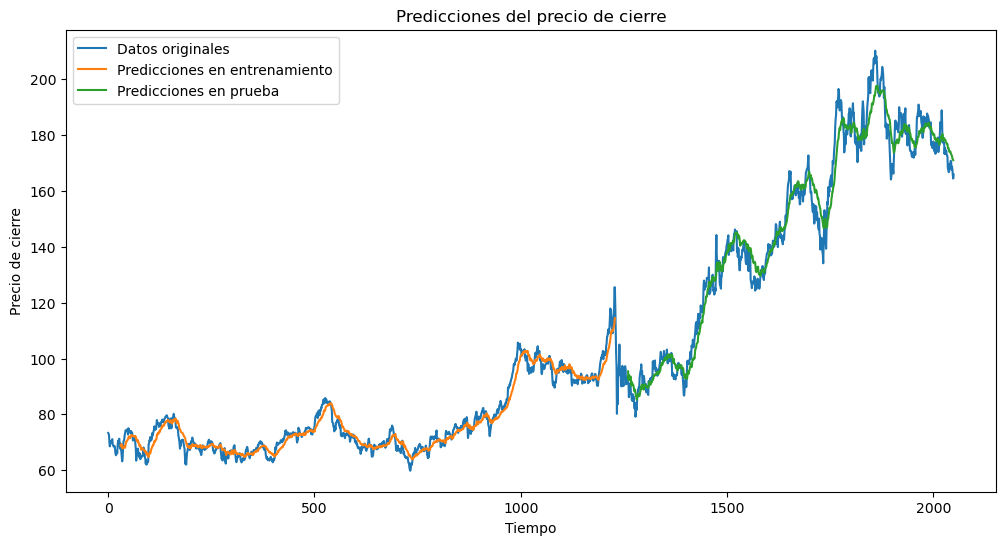

In [ ]:
# Crear un DataFrame con las predicciones y los datos originales
original_data = scaler.inverse_transform(scaled_data) #Se aplica la función inverse_transform del objeto scaler para obtener los datos originales en la escala original. Esto revierte la normalización que se había aplicado previamente.
train_predictions = np.empty_like(original_data) #Se crea un array vacío train_predictions con la misma forma que original_data. Este array se utilizará para almacenar las predicciones del modelo para los datos de entrenamiento.
train_predictions[:, :] = np.nan #Se asigna el valor nan (Not a Number) a todas las posiciones del array train_predictions. Esto se hace para marcar como desconocidas las posiciones que no contienen predicciones.
train_predictions[look_back:len(train_predict) + look_back, :] = train_predict #e asignan las predicciones del modelo para los datos de entrenamiento al array train_predictions. Las predicciones se colocan en las posiciones adecuadas dentro del array, comenzando desde la posición look_back hasta len(train_predict) + look_back.
test_predictions = np.empty_like(original_data) # Se crea un array vacío test_predictions con la misma forma que original_data. Este array se utilizará para almacenar las predicciones del modelo para los datos de prueba.
test_predictions[:, :] = np.nan #Se asigna el valor nan a todas las posiciones del array test_predictions.
test_predictions[len(train_predict) + (look_back * 2) + 1:len(scaled_data) - 1, :] = test_predict #Se asignan las predicciones del modelo para los datos de prueba al array test_predictions. Las predicciones se colocan en las posiciones adecuadas dentro del array, comenzando desde la posición len(train_predict) + (look_back * 2) + 1 hasta len(scaled_data) - 1.

predictions_data = np.concatenate((original_data, train_predictions, test_predictions), axis=1) #Se concatenan los arrays original_data, train_predictions y test_predictions a lo largo del eje 1 (columnas). Esto crea un nuevo array predictions_data que contiene los datos originales, las predicciones en entrenamiento y las predicciones en prueba.
predictions_df = pd.DataFrame(predictions_data, columns=['Datos originales', 'Predicciones en entrenamiento', 'Predicciones en prueba']) #Se crea un DataFrame llamado predictions_df a partir de predictions_data. Se especifican los nombres de las columnas como 'Datos originales', 'Predicciones en entrenamiento' y 'Predicciones en prueba'.

# Crear un DataFrame con los datos de LSTM
lstm_df = pd.DataFrame(lstm_data, columns=['Datos originales', 'Predicciones en entrenamiento', 'Predicciones en prueba'])

# Guardar resultados en un archivo Excel
with pd.ExcelWriter('resultados_modelo_LSTM.xlsx') as writer:
    results.to_excel(writer, sheet_name='Resultados', index=False)
    predictions_df.to_excel(writer, sheet_name='Predicciones', index=False)
    lstm_df.to_excel(writer, sheet_name='Predicciones', startrow=3, index=False, header=False)


# Graficamos los datos
plt.figure(figsize=(12, 6))
plt.plot(original_data, label='Datos originales')
plt.plot(train_predictions, label='Predicciones en entrenamiento')
plt.plot(test_predictions, label='Predicciones en prueba')
plt.xlabel('Tiempo')
plt.ylabel('Precio de cierre')
plt.title('Predicciones del precio de cierre')
plt.legend()
plt.show()

### Stacked LSTM

In [ ]:
# Seleccionamos las columnas 'Close' y 'Volume'
data = df[['Close', 'Volume']].values #ante ssolo hemso utilizado los datso pasados del valor de cierrer y ahroa hemos metido también el volumen. Podriamos meter todos pero como están tan correlacionados, creo que así es mejor

# Normalizamos los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

scaler_close = MinMaxScaler()
scaler_close.fit(data[:, 0].reshape(-1, 1))

# Dividimos los datos en entrenamiento y prueba
train_size = int(len(scaled_data) * 0.6) #tambien cambiar
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Función para crear el dataset de entrenamiento
def create_dataset(dataset, look_back=1, look_forward=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-look_forward):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        b = [dataset[i + j, 0] for j in range(look_back, look_back + look_forward)]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

# Creamos el dataset de entrenamiento
look_back = 90 #cuanto mira haci a atras #mismo
look_forward = 1 #mada, los mismos dias, 1
X_train, y_train = create_dataset(train, look_back, look_forward)

# Creamos el dataset de prueba
X_test, y_test = create_dataset(test, look_back, look_forward)

# Convertimos los datos a arreglos de numpy
X_train = np.reshape(X_train, (X_train.shape[0], look_back, X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], look_back, X_test.shape[2]))

## Modelo de RNN LSTM
# Definimos el modelo
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(25))
model.add(Dense(look_forward)) #aqui me va a ir a ver cuantos dias estoy prediciendo hacia delante para poner ese numero de neuronas
model.compile(optimizer='adam', loss='mean_squared_error')
#vamos a tener más modelos proqie tenemos más capas y para cada una va a ir probando las diferentes alternativas

from keras.callbacks import EarlyStopping
# simple early stopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1)

# Entrenamos el modelo
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1, callbacks=[es]) #batch 16 y epoch 50

# Hacemos las predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertimos las predicciones
train_predict = scaler_close.inverse_transform(train_predict)
y_train = scaler_close.inverse_transform(y_train)
test_predict = scaler_close.inverse_transform(test_predict)
y_test = scaler_close.inverse_transform(y_test)


In [ ]:
# Cálculo de métricas de error
def calc_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return [rmse, mae, r2]

metrics_train = calc_metrics(y_train, train_predict)
metrics_test = calc_metrics(y_test, test_predict)

metrics_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'], columns=['Train', 'Test'])
metrics_df['Train'] = metrics_train
metrics_df['Test'] = metrics_test

print(metrics_df)

### Bidirectional LSTM

In [ ]:
# Seleccionamos las columnas 'Close' y 'Volume'
data = df[['Close', 'Volume']].values

# Normalizamos los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

scaler_close = MinMaxScaler()
scaler_close.fit(data[:, 0].reshape(-1, 1))

# Dividimos los datos en entrenamiento y prueba
train_size = int(len(scaled_data) * 0.6)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Función para crear el dataset de entrenamiento
def create_dataset(dataset, look_back=1, look_forward=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-look_forward):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        b = [dataset[i + j, 0] for j in range(look_back, look_back + look_forward)]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

# Creamos el dataset de entrenamiento
look_back = 60 #lo mismo 30,60,90
look_forward = 1
X_train, y_train = create_dataset(train, look_back, look_forward)

# Creamos el dataset de prueba
X_test, y_test = create_dataset(test, look_back, look_forward)

# Convertimos los datos a arreglos de numpy
X_train = np.reshape(X_train, (X_train.shape[0], look_back, X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], look_back, X_test.shape[2]))

## Modelo de RNN LSTM
# Definimos el modelo
model = Sequential()
model.add(Bidirectional(LSTM(32), input_shape=(X_train.shape[1], X_train.shape[2]))) #16,32,64
model.add(Dense(look_forward))
model.compile(optimizer='adam', loss='mean_squared_error')

from keras.callbacks import EarlyStopping
# simple early stopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1)

# Entrenamos el modelo
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1, callbacks=[es]) #batch 16 y epoch 50

# Hacemos las predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertimos las predicciones
train_predict = scaler_close.inverse_transform(train_predict)
y_train = scaler_close.inverse_transform(y_train)
test_predict = scaler_close.inverse_transform(test_predict)
y_test = scaler_close.inverse_transform(y_test)


In [ ]:
# Cálculo de métricas de error
def calc_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return [rmse, mae, r2]

metrics_train = calc_metrics(y_train, train_predict)
metrics_test = calc_metrics(y_test, test_predict)

metrics_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'], columns=['Train', 'Test'])
metrics_df['Train'] = metrics_train
metrics_df['Test'] = metrics_test

print(metrics_df)

In [ ]:
# Graficamos los datos
plt.figure(figsize=(15,8))

# Graficamos los datos originales
plt.plot(scaler_close.inverse_transform(scaled_data[:, 0].reshape(-1, 1)), color='black', label='Datos originales')
# Graficamos las predicciones de entrenamiento
plt.plot(range(look_back, len(train_predict) + look_back),
         np.array([x[0] for x in train_predict]), color='blue', label='Predicciones en entrenamiento')

# Graficamos las predicciones de prueba
plt.plot(range(len(train_predict) + look_back*2 + look_forward, len(scaled_data) - look_forward),
         np.array([x[0] for x in test_predict]), color='red', label='Predicciones en prueba')

# Graficamos las predicciones del próximo día
future_days = range(len(scaled_data) - look_forward, len(scaled_data))
future_predictions = model.predict(np.array([scaled_data[-look_back:]]))[0]
plt.scatter(future_days, scaler_close.inverse_transform(future_predictions.reshape(-1, 1)),
            marker='x', color='green', label='Predicción del día siguiente')
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Precio de cierre', fontsize=14)
plt.title('Predicciones del precio de cierre', fontsize=18)

plt.legend()
plt.show()

## CNN-LSTM

In [ ]:
## diseñamos una CNN-LSTM
# Seleccionamos las columnas 'Close' y 'Volume'
data = df[['Close', 'Volume']].values

# Normalizamos los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

scaler_close = MinMaxScaler()
scaler_close.fit(data[:, 0].reshape(-1, 1))

# Dividimos los datos en entrenamiento y prueba
train_size = int(len(scaled_data) * 0.6) #cambiar pot 70/30 (TODOS)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Función para crear el dataset de entrenamiento
def create_dataset(dataset, look_back=1, look_forward=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-look_forward):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        b = [dataset[i + j, 0] for j in range(look_back, look_back + look_forward)]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

# Creamos el dataset de entrenamiento
look_back = 30 #mismo 30,60,90
look_forward = 1
X_train, y_train = create_dataset(train, look_back, look_forward)

# Creamos el dataset de prueba
X_test, y_test = create_dataset(test, look_back, look_forward)

# Convertimos los datos a arreglos de numpy
X_train = np.reshape(X_train, (X_train.shape[0], look_back, X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], look_back, X_test.shape[2]))

## Modelo de CNN-LSTM, aqui estas creando la estructura del modelo
# Definimos el modelo
model = Sequential()

#esperar confrimacion para este
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(look_back, X_train.shape[2]))) #METEMOS AQUI CNN
model.add(MaxPooling1D(pool_size=2)) #reduce la dimenasionalidad
model.add(Flatten())
model.add(Reshape((X_train.shape[1], -1)))
model.add(LSTM(64)) #aqui 16,32,64
model.add(Dense(look_forward))
model.compile(optimizer='adam', loss='mean_squared_error')

from keras.callbacks import EarlyStopping
# simple early stopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1)

# Entrenamos el modelo
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1, callbacks=[es]) #batch 16 y epoch 50

# Hacemos las predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertimos las predicciones
train_predict = scaler_close.inverse_transform(train_predict)
y_train = scaler_close.inverse_transform(y_train)
test_predict = scaler_close.inverse_transform(test_predict)
y_test = scaler_close.inverse_transform(y_test)

In [ ]:
# Cálculo de métricas de error
def calc_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return [rmse, mae, r2]

metrics_train = calc_metrics(y_train, train_predict)
metrics_test = calc_metrics(y_test, test_predict)

metrics_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'], columns=['Train', 'Test'])
metrics_df['Train'] = metrics_train
metrics_df['Test'] = metrics_test

print(metrics_df)

In [ ]:
# Graficamos los datos
plt.figure(figsize=(15,8))


# Graficamos los datos originales
plt.plot(scaler_close.inverse_transform(scaled_data[:, 0].reshape(-1, 1)), color='black', label='Datos originales')
# Graficamos las predicciones de entrenamiento
plt.plot(range(look_back, len(train_predict) + look_back),
         np.array([x[0] for x in train_predict]), color='blue', label='Predicciones en entrenamiento')

# Graficamos las predicciones de prueba
plt.plot(range(len(train_predict) + look_back*2 + look_forward, len(scaled_data) - look_forward),
         np.array([x[0] for x in test_predict]), color='red', label='Predicciones en prueba')

plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Precio de cierre', fontsize=14)
plt.title('Predicciones del precio de cierre', fontsize=18)

plt.legend()
plt.show()

# GRÁFICA FINAL COMPARATIVA